<a href="https://colab.research.google.com/github/mameaicha/gomycodeMAC/blob/main/UnsupervisedAssociationRulesCheckpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U mlxtend

In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# profiling and data download
from ydata_profiling.utils.cache import cache_file




In [ ]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


# visualization before applying the Apriori algorithm

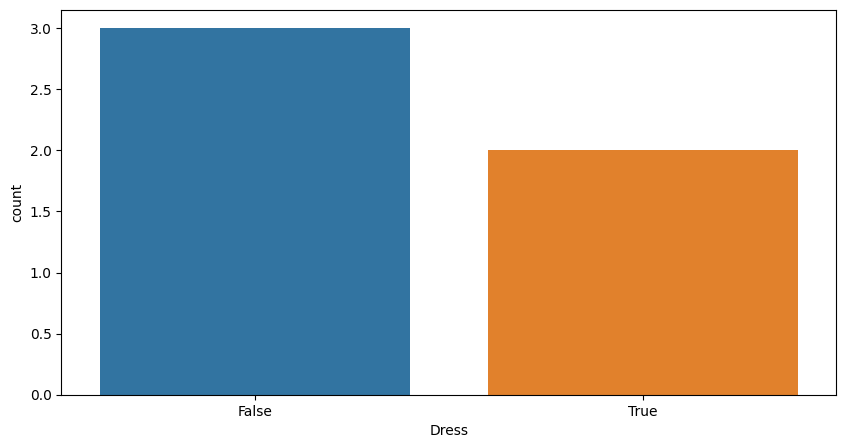

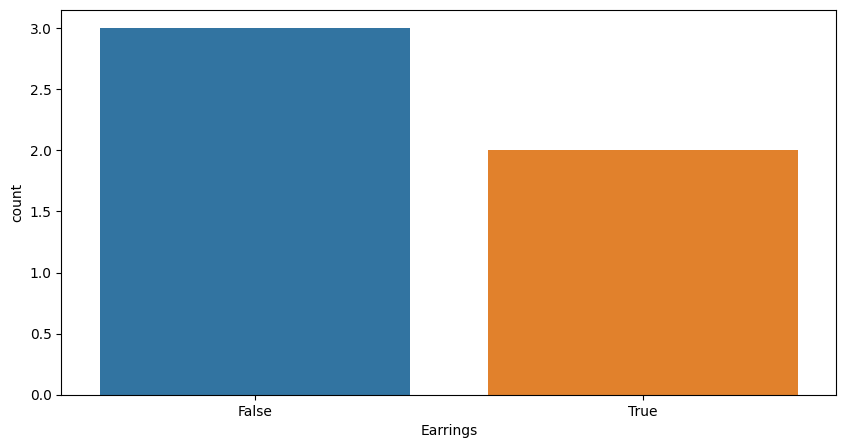

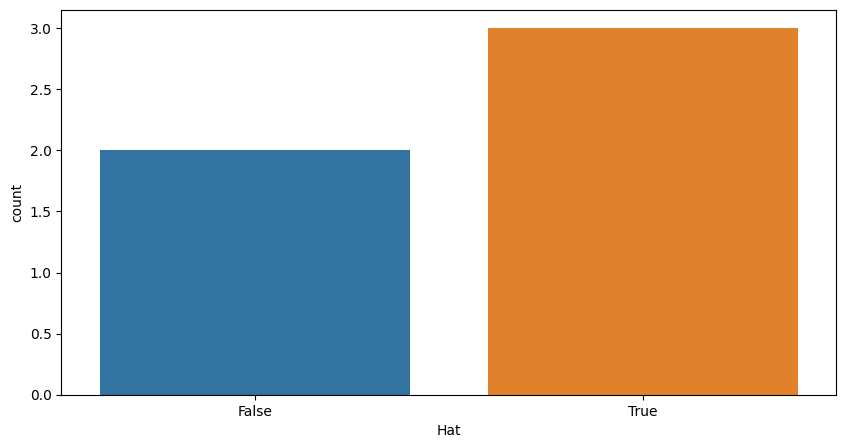

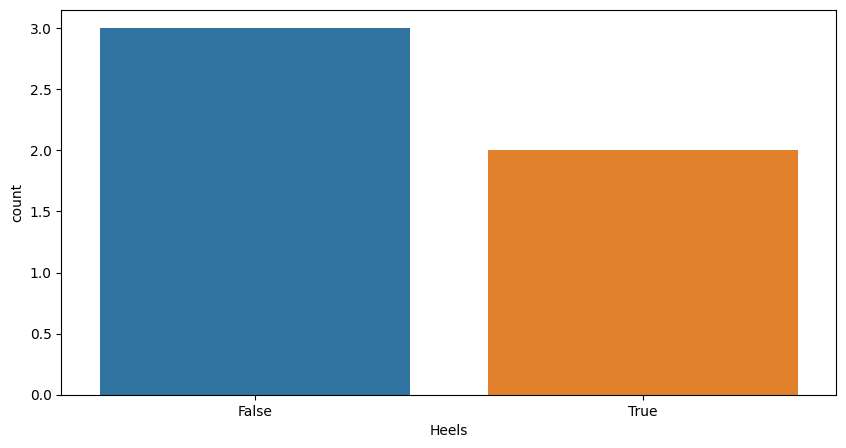

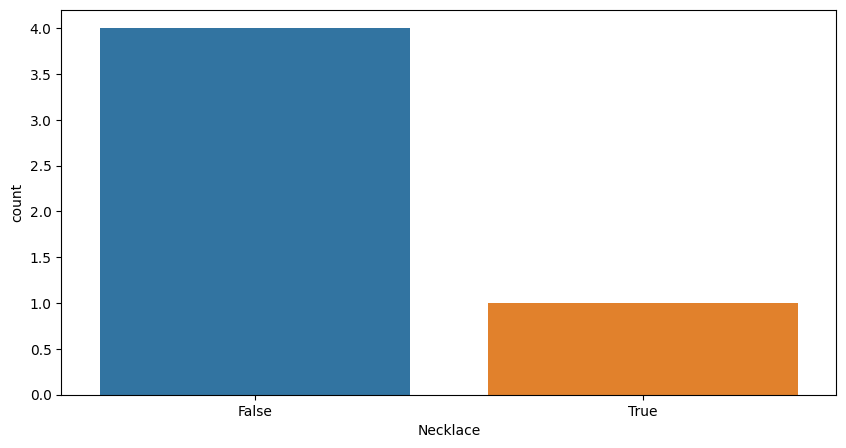

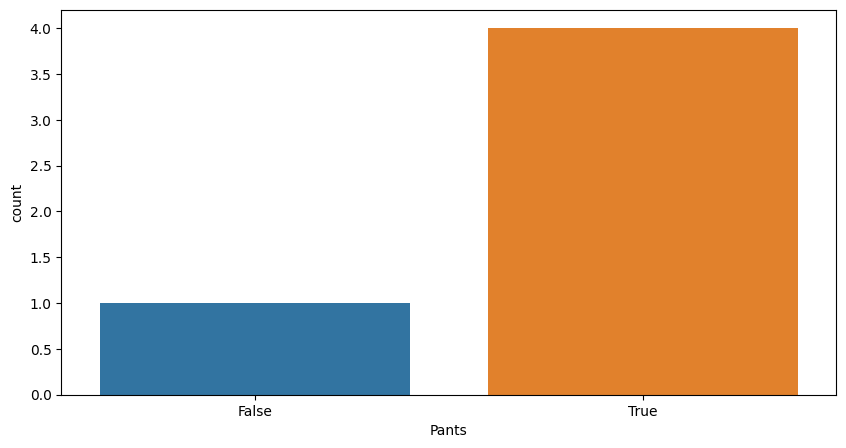

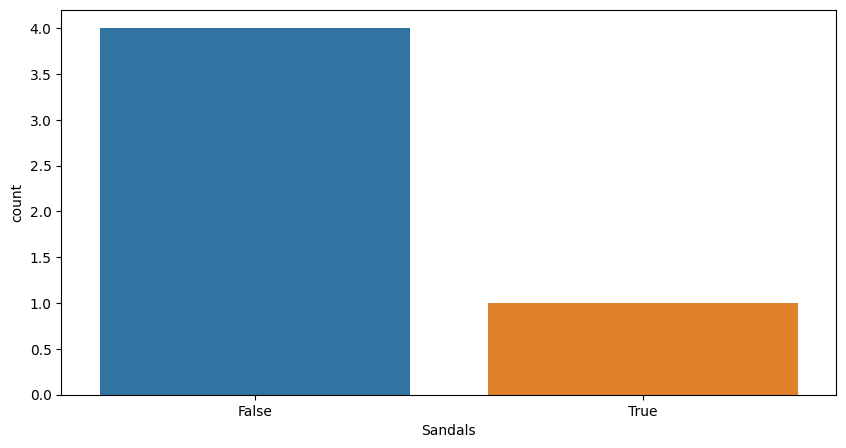

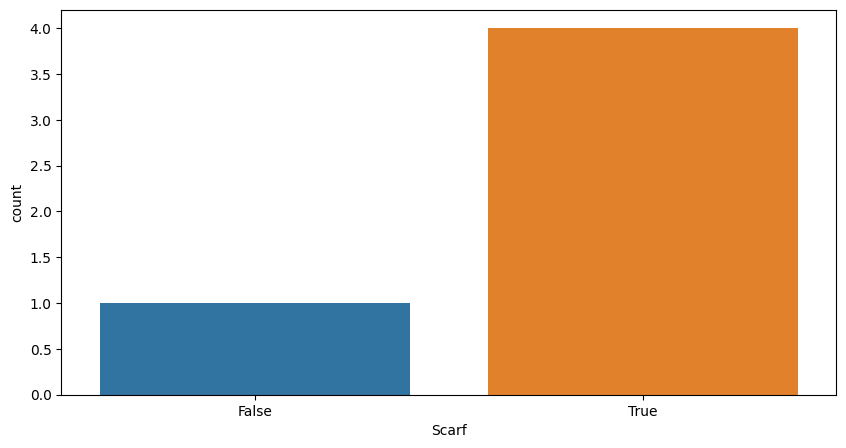

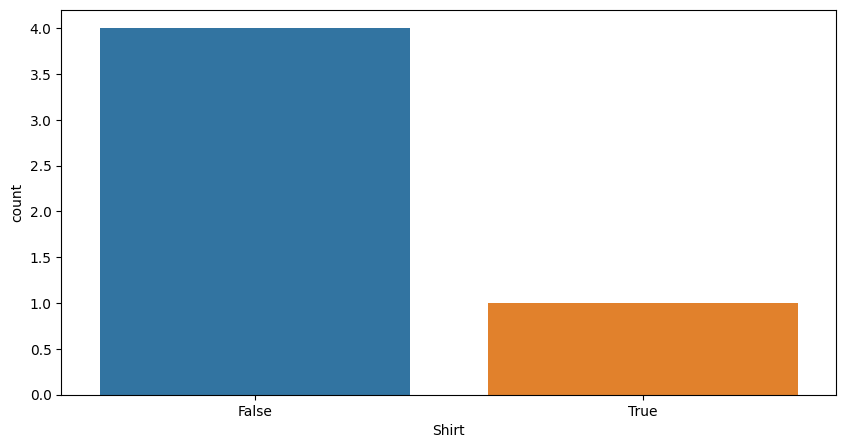

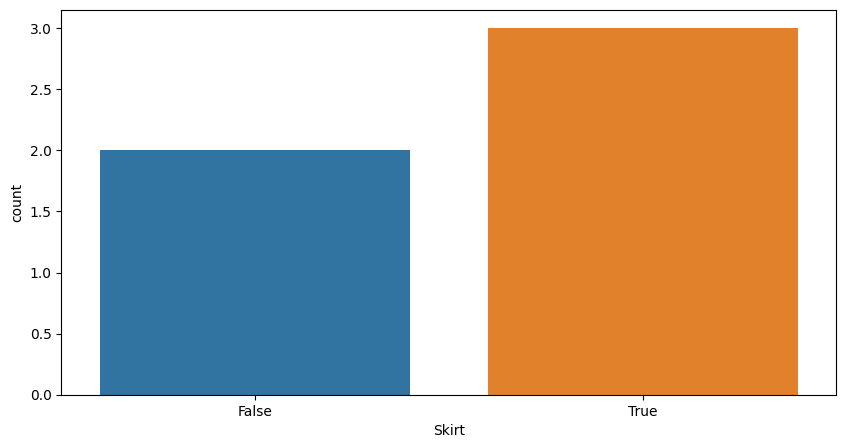

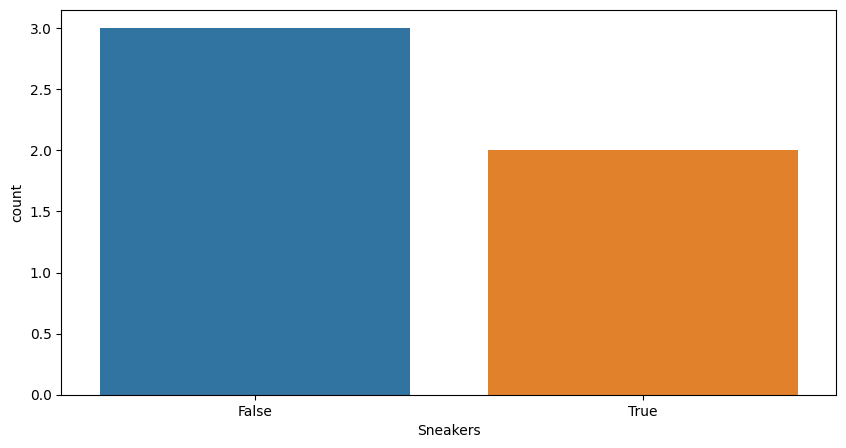

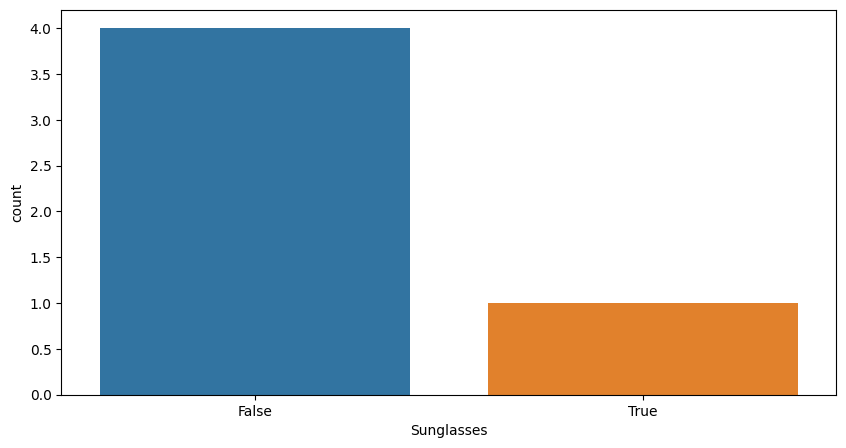

In [ ]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, data=df)
  plt.show()

# Applying the Apriori algorithm

In [ ]:
#Support with column names
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


Les articles  les plus achetés sont  'Scarf' et 'Pants'

In [ ]:
#Confidence Code
#In case we want to extract rules based on other metrics like confidence,
# we can use association_rules from mlxtend.frequent_patterns library.

association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6,1.00
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf,0.50


Il y 75% de chanche d'acheter 'Pants' lorsqu'on a déja acheté 'Scarf' et vice- versa.

ceux qui ont acheté 'Pants' ont 75% de chanche d'acheter 'Skirt'. Par contre ceux qui ont acheté 'Skirt' achetent forcement 	'Pants'.

In [ ]:
# Associating based on Lift
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5


#  with a bigger dataset

In [36]:
# load and read dataset
file_name = cache_file(
    "Market_Basket_Optimisation.csv",
    "https://drive.google.com/u/0/uc?id=109dPPJzZbjzMUp3JQBx5rQ538fzMNYzU&export=download",
)

data = pd.read_csv(file_name, header = None,sep=",")
# make a copy
df2=data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#replace NaN values in all columns with empty string
df2.fillna('', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
#convert data to list of list
tab=df2.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#remove nan values
# Creating an empty list
res=[]
for i in range(len(tab) -1):
  mylist=tab[i]
  l = list(filter(None, mylist))
  # appending the temporary list
  res.append(l)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#Apply one-hot-encoding on our dataset
te=TransactionEncoder()
te_ary=te.fit(res).transform(res)
df2=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Ce dataset comporte 7500 transactions et est constitué de 120 articles distincts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


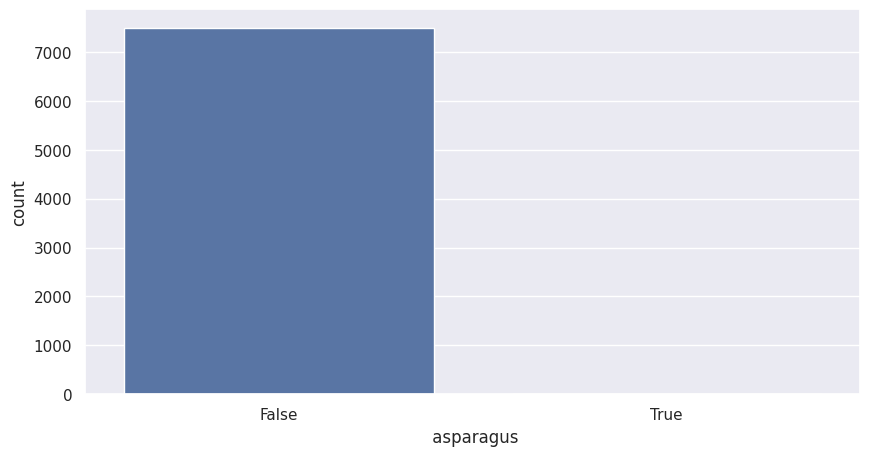

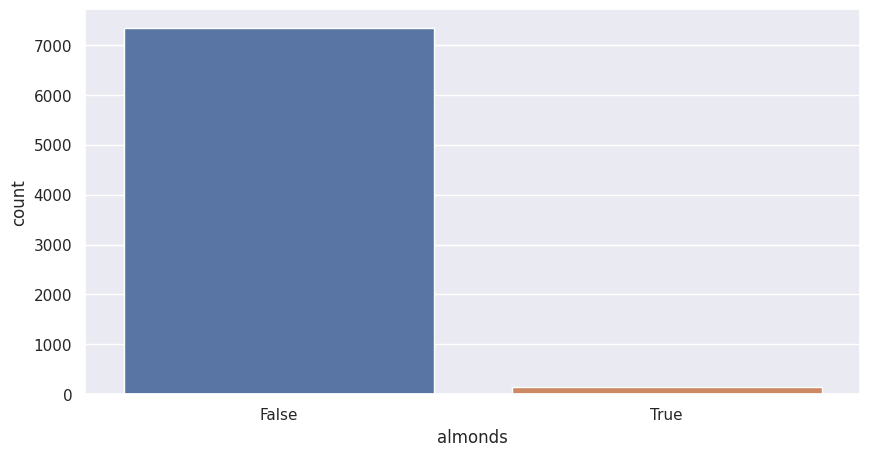

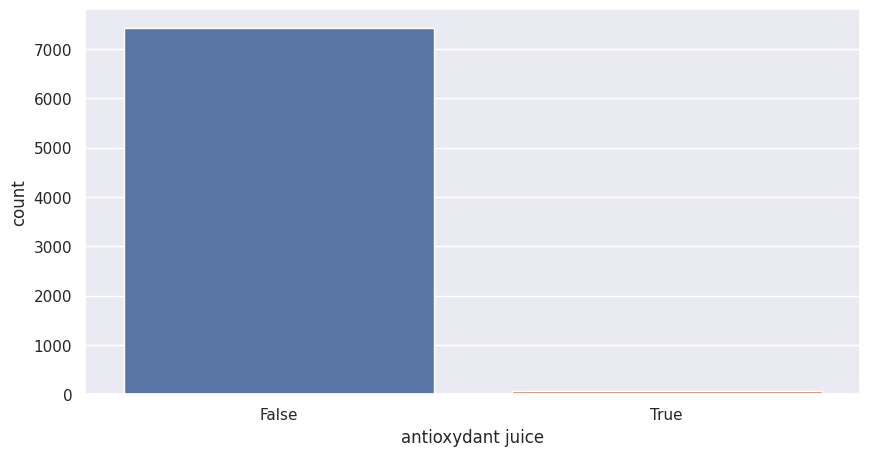

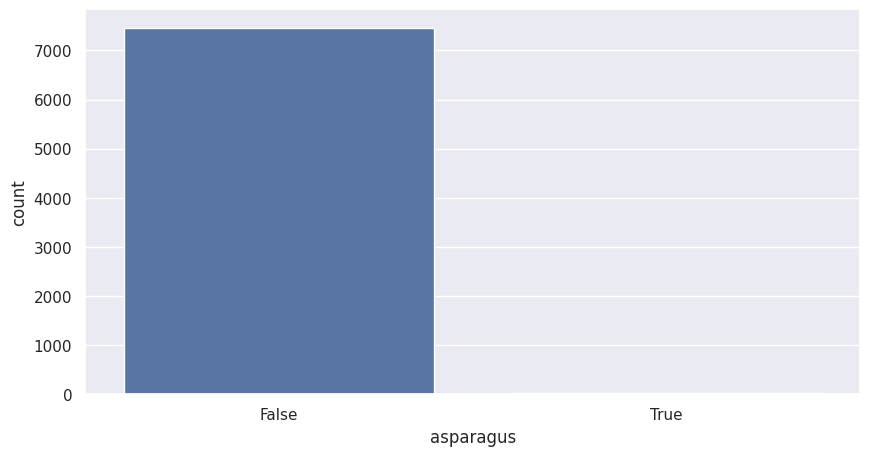

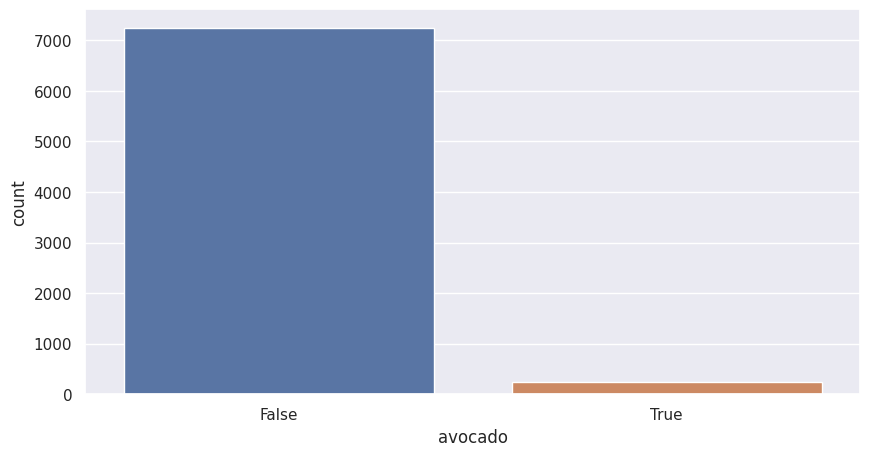

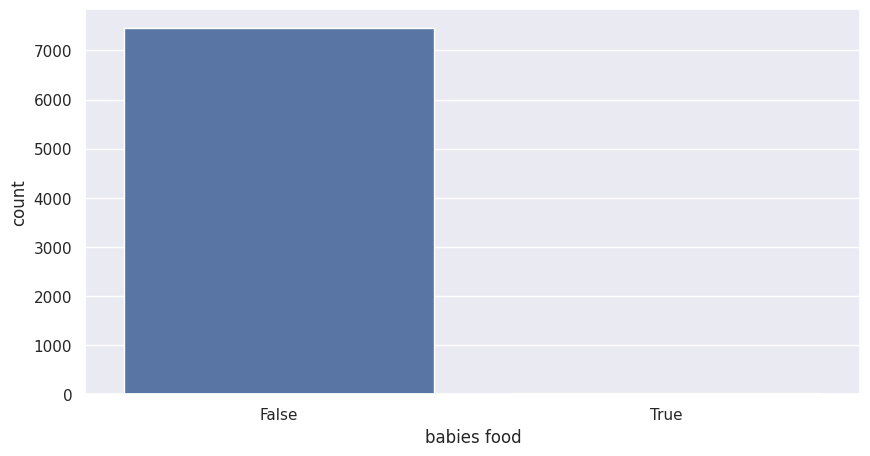

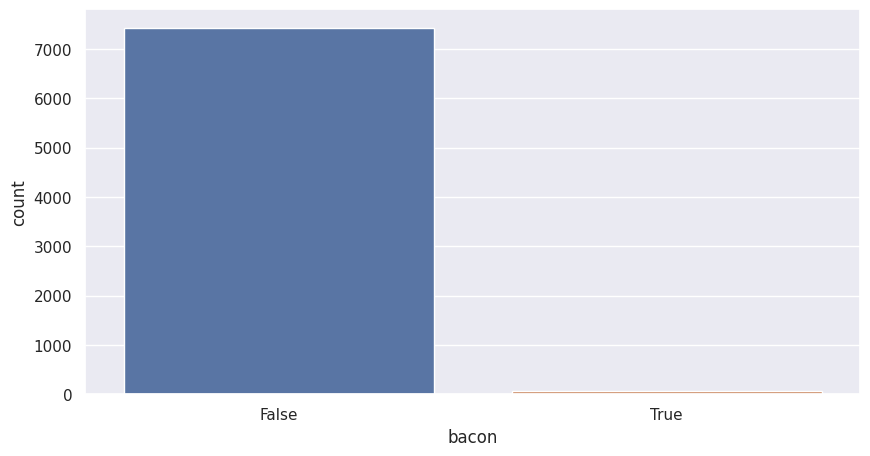

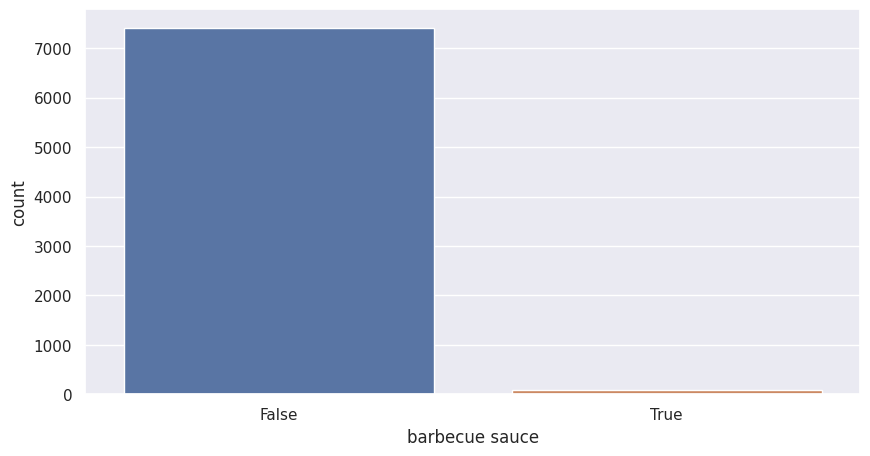

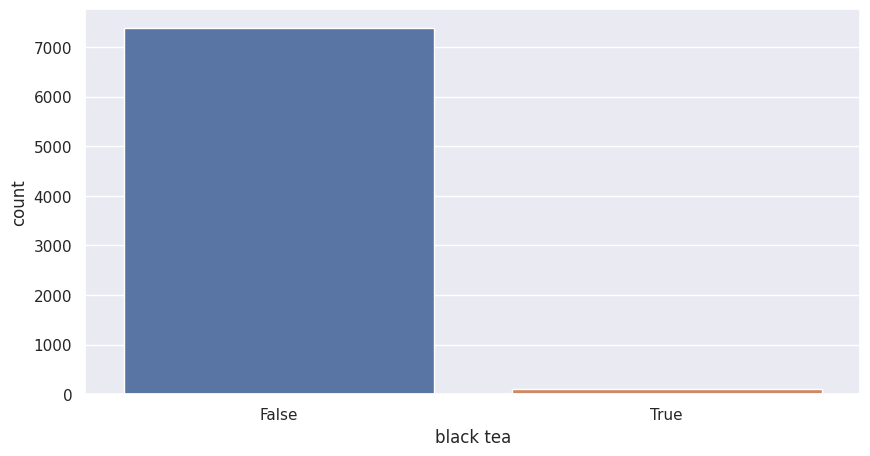

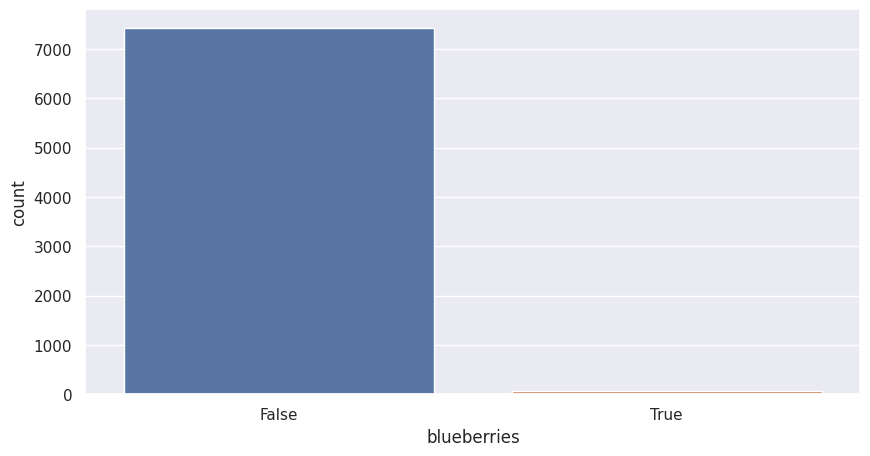

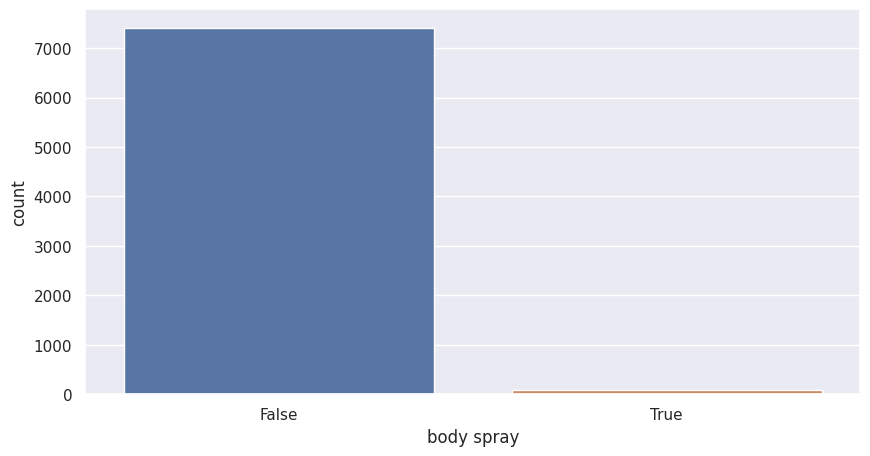

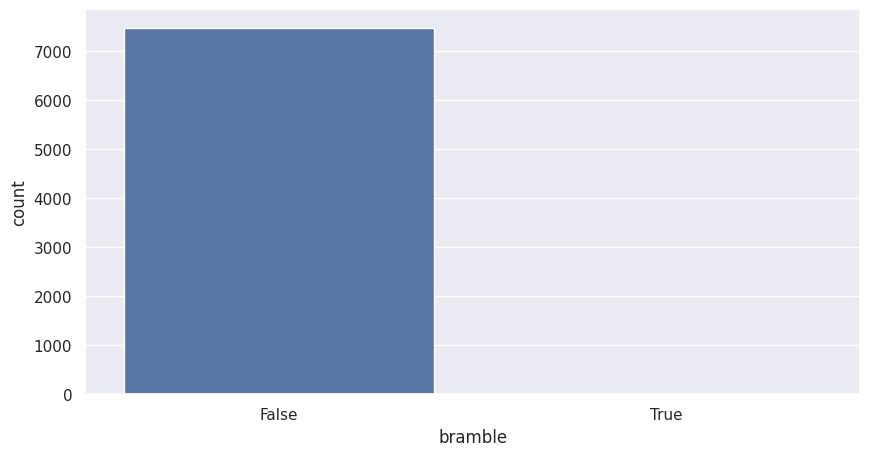

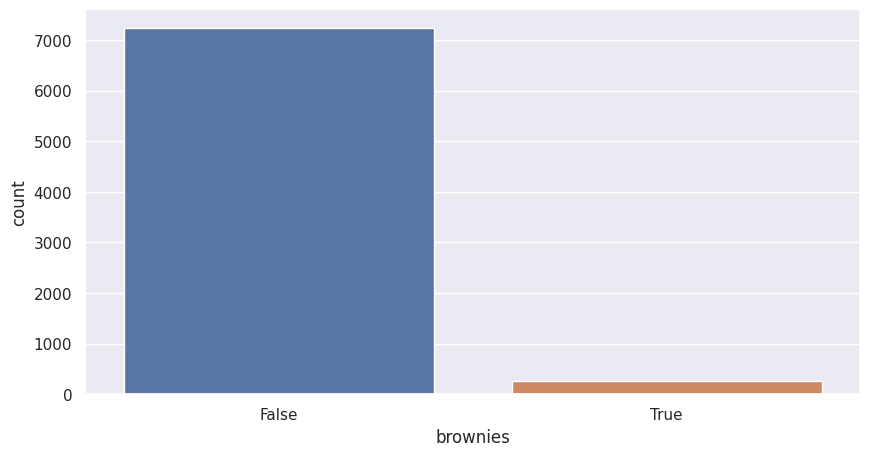

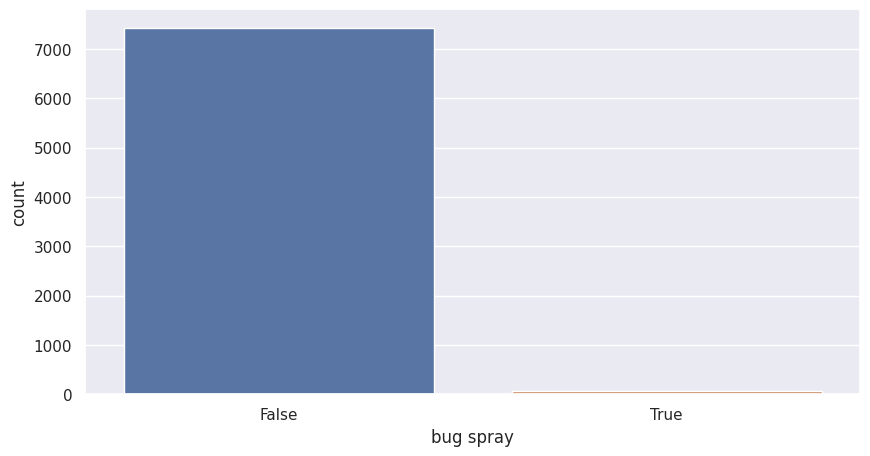

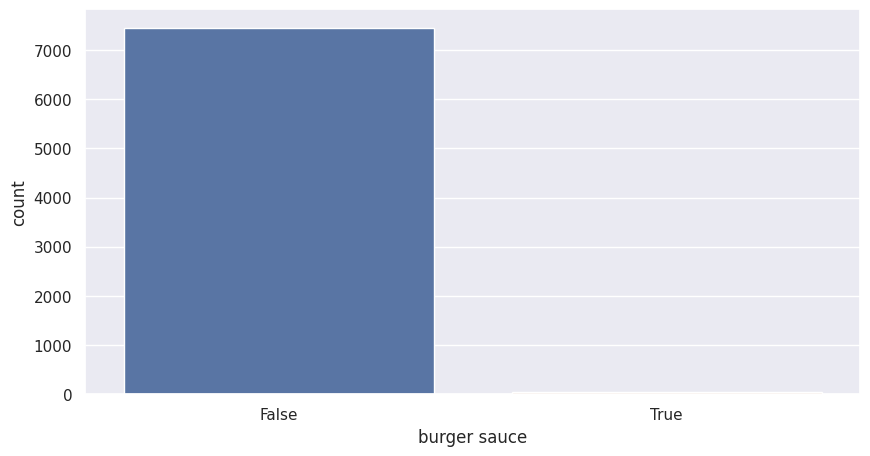

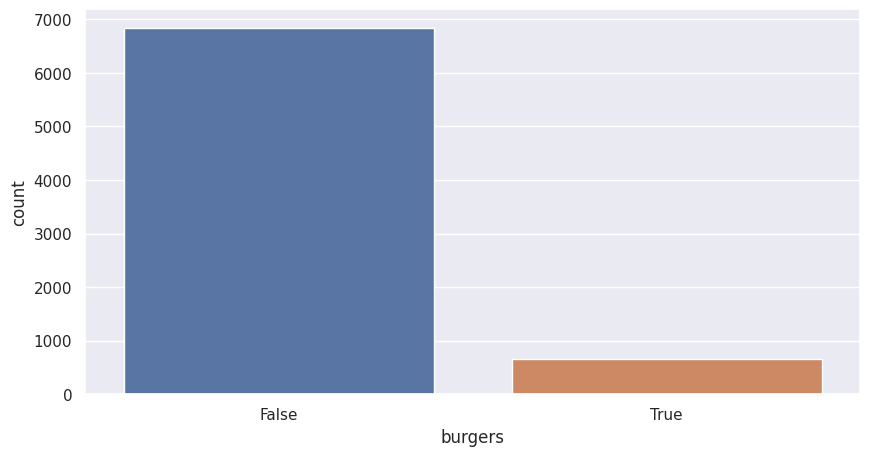

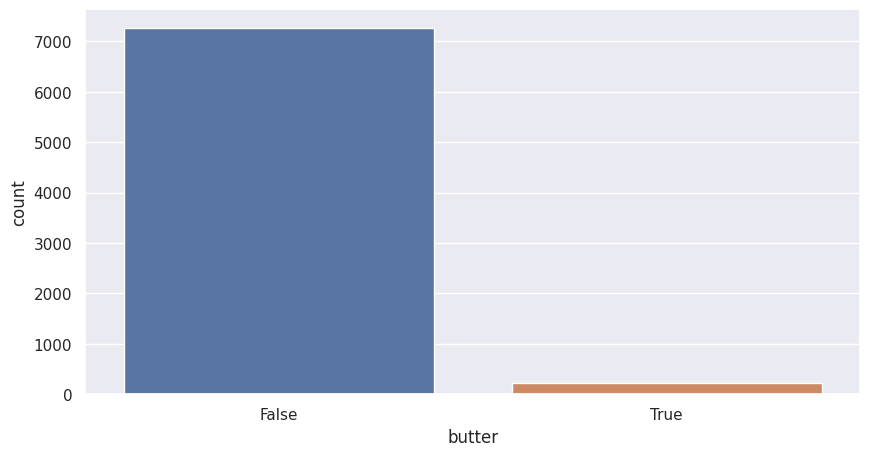

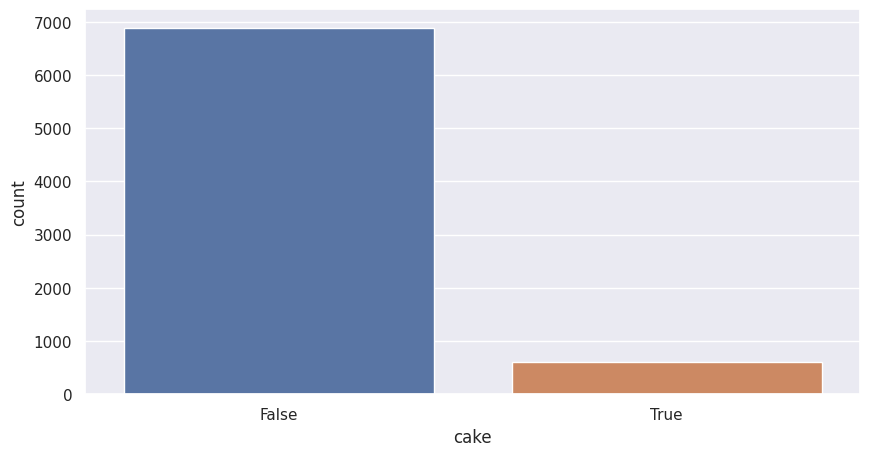

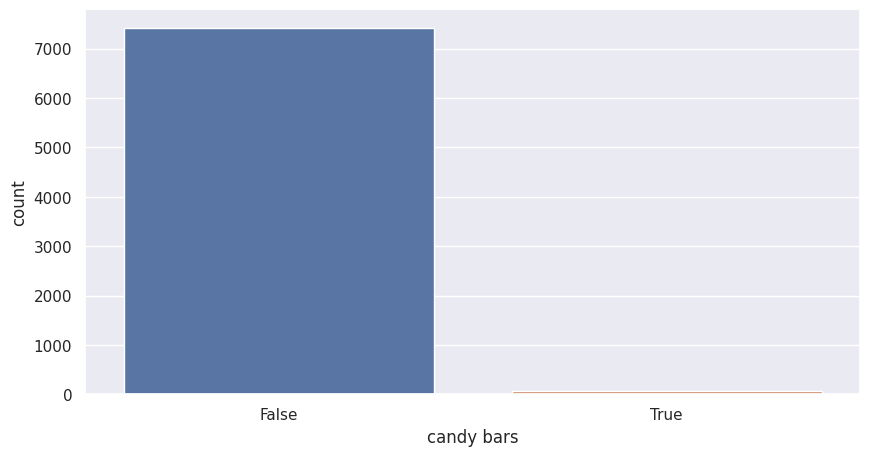

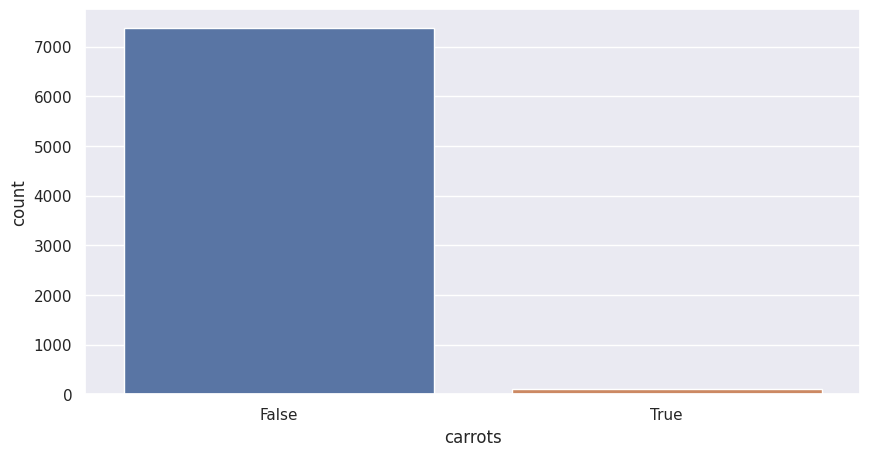

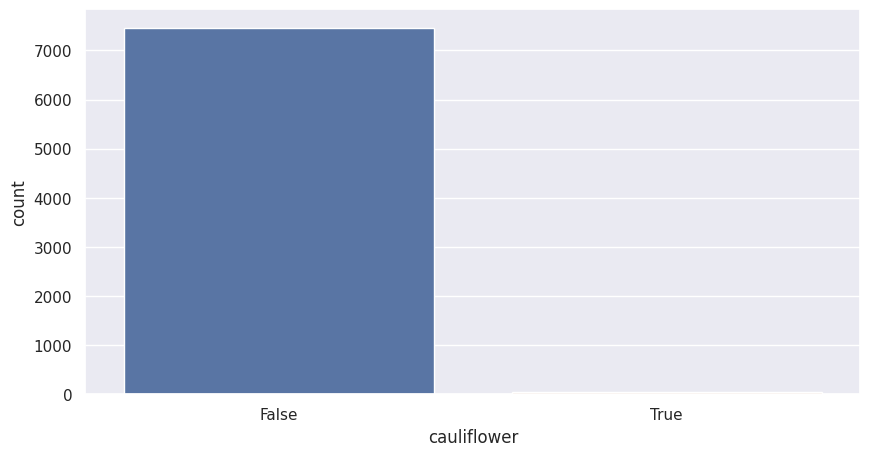

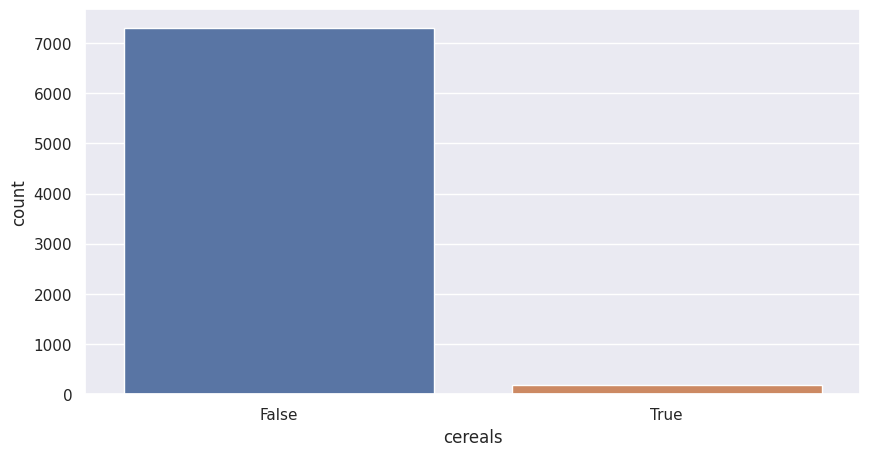

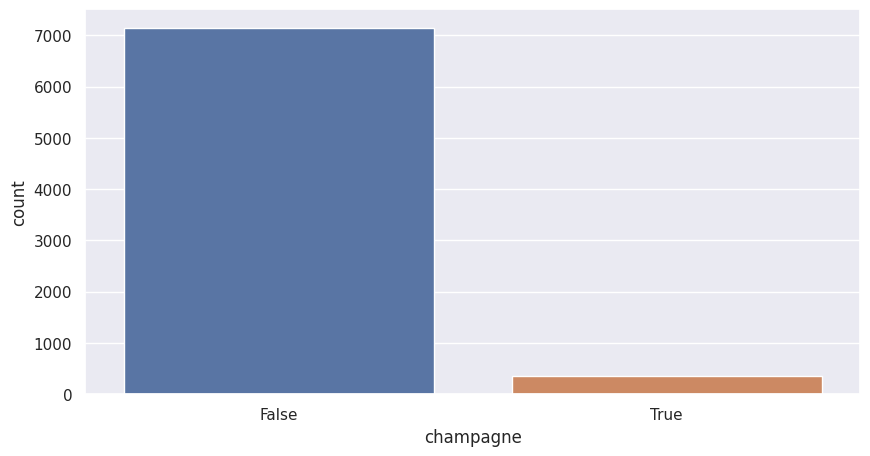

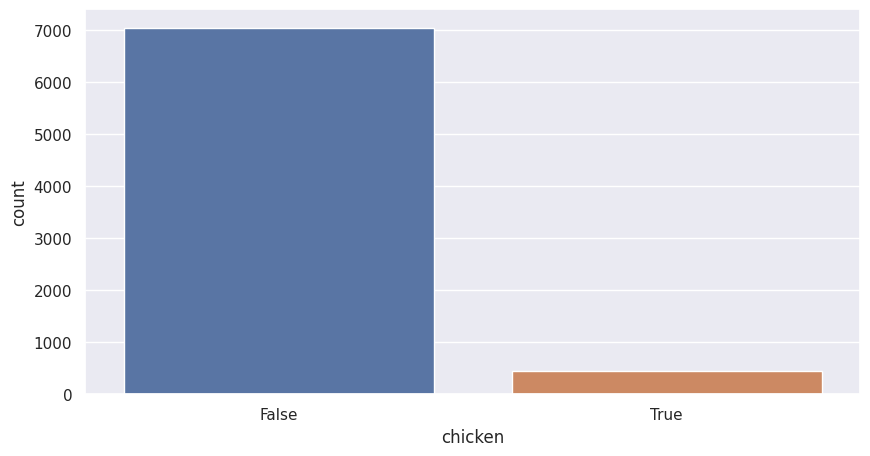

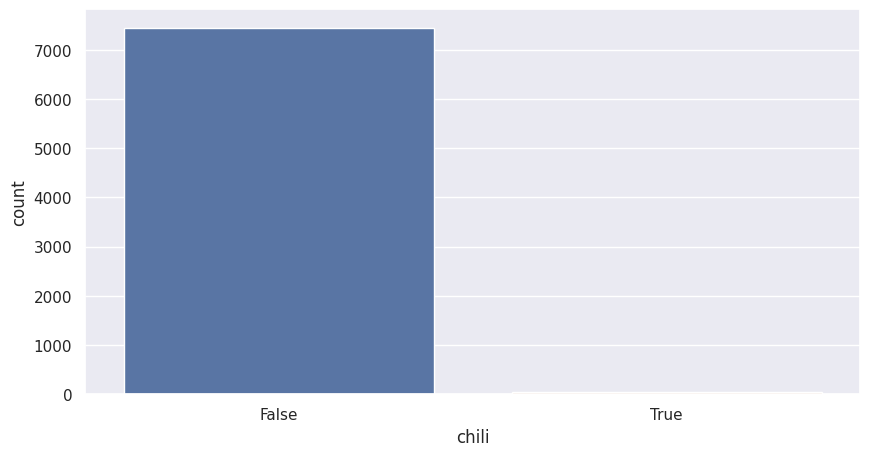

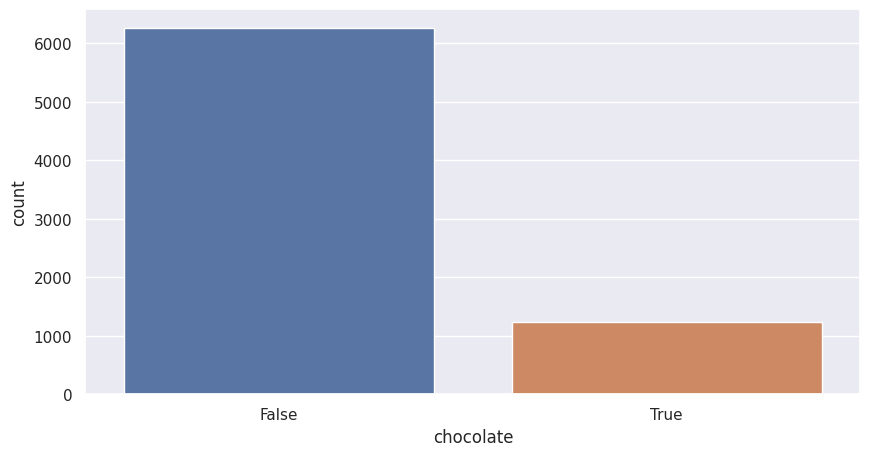

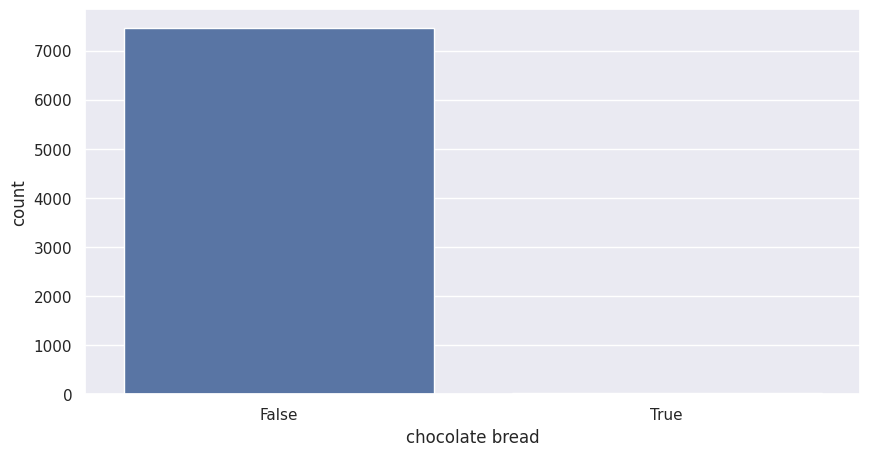

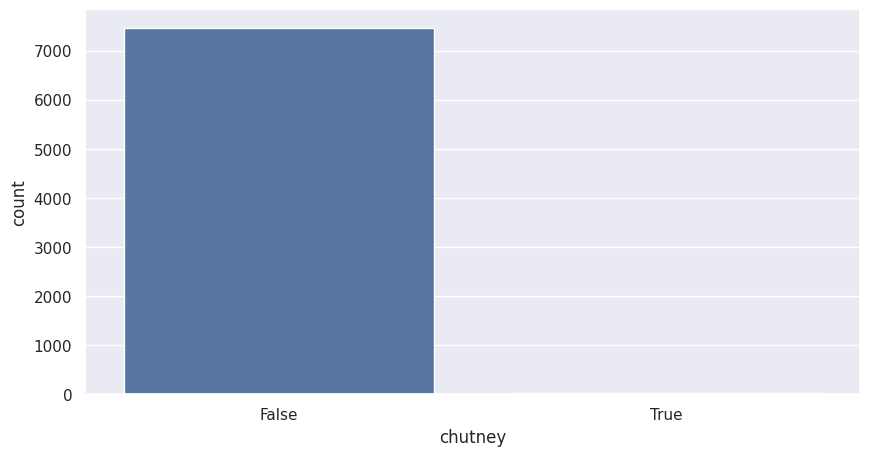

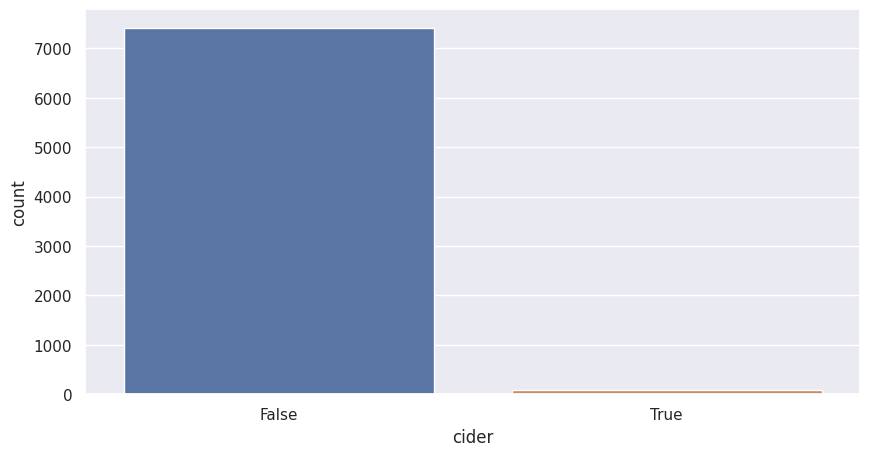

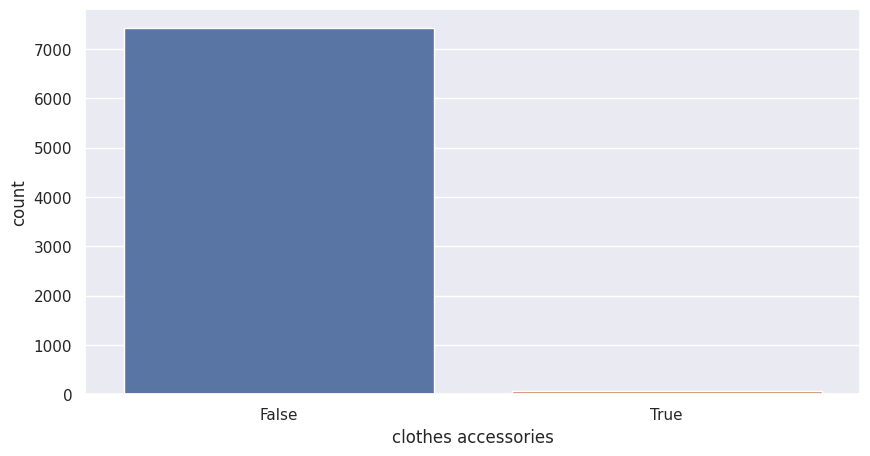

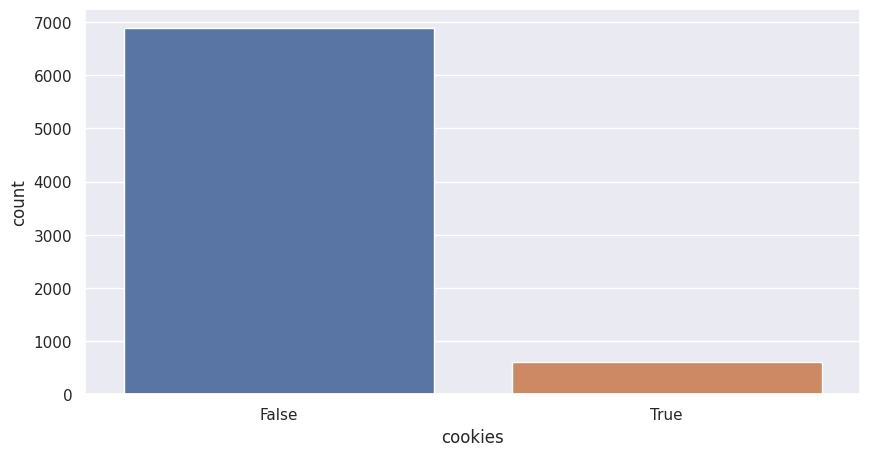

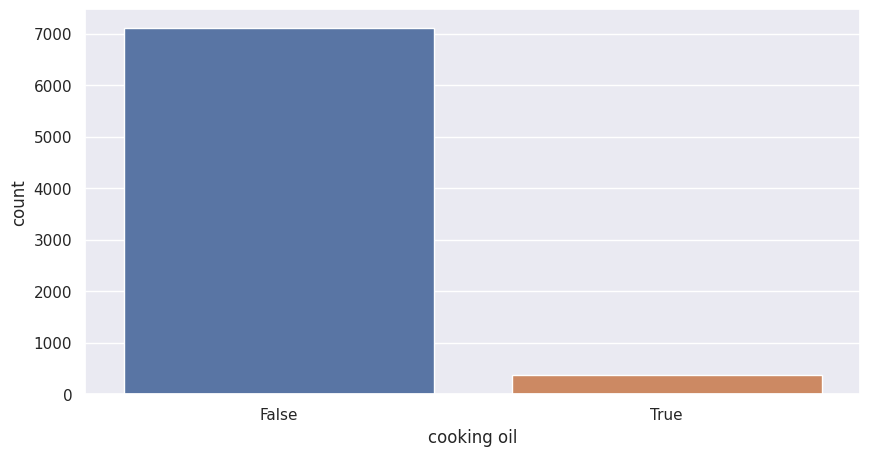

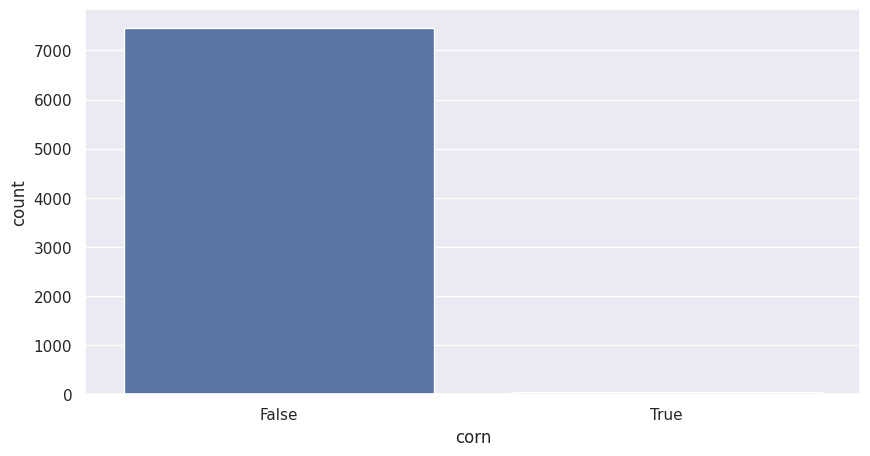

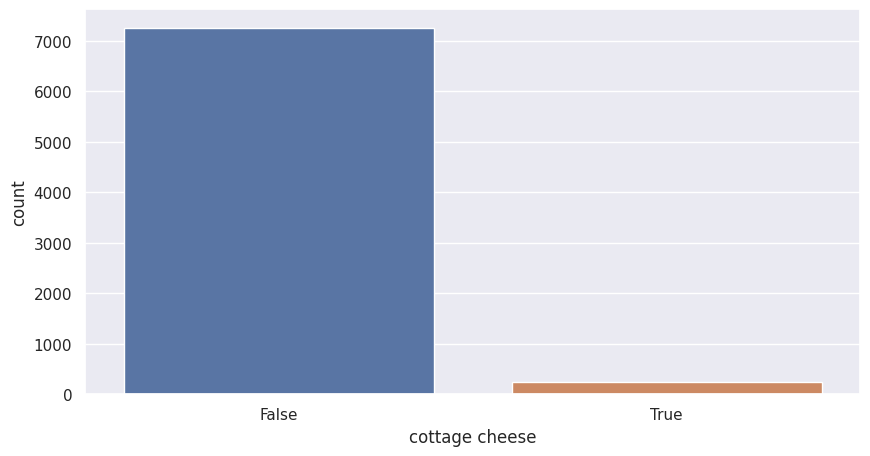

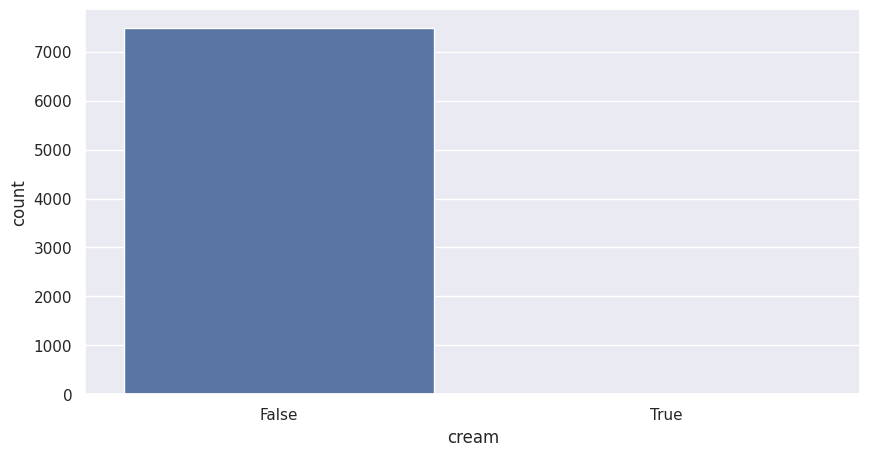

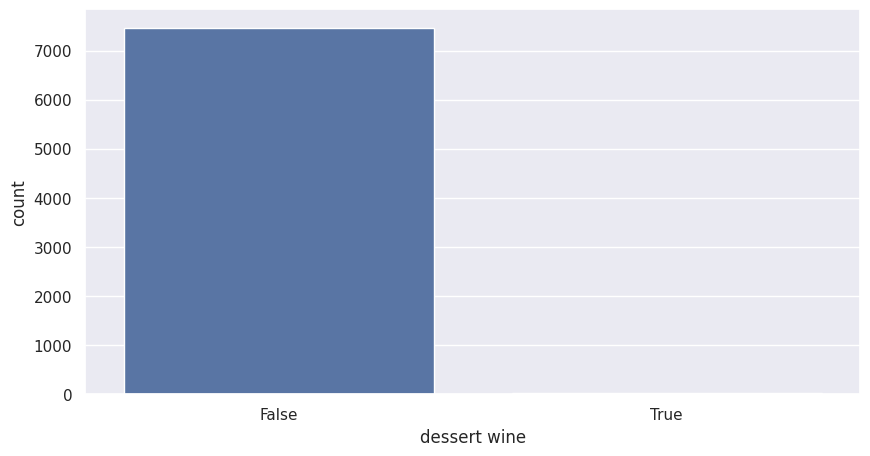

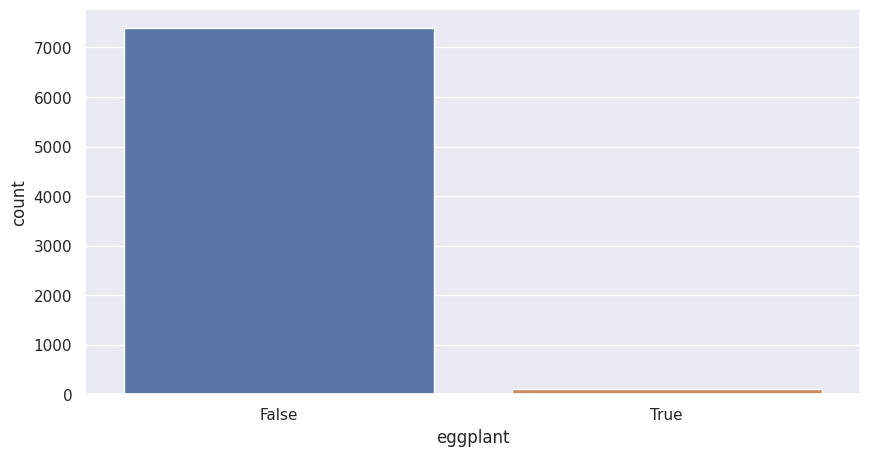

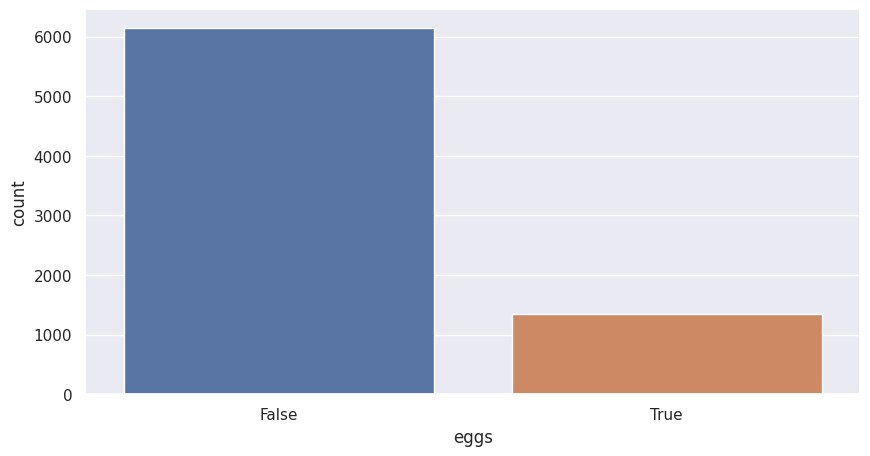

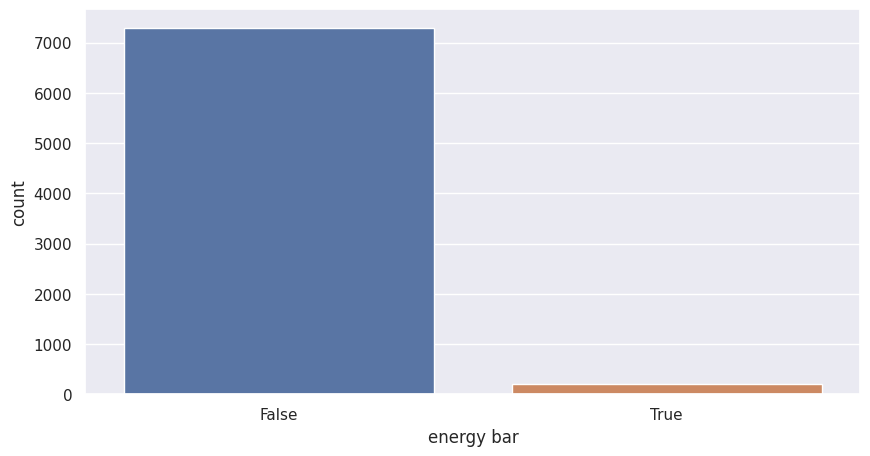

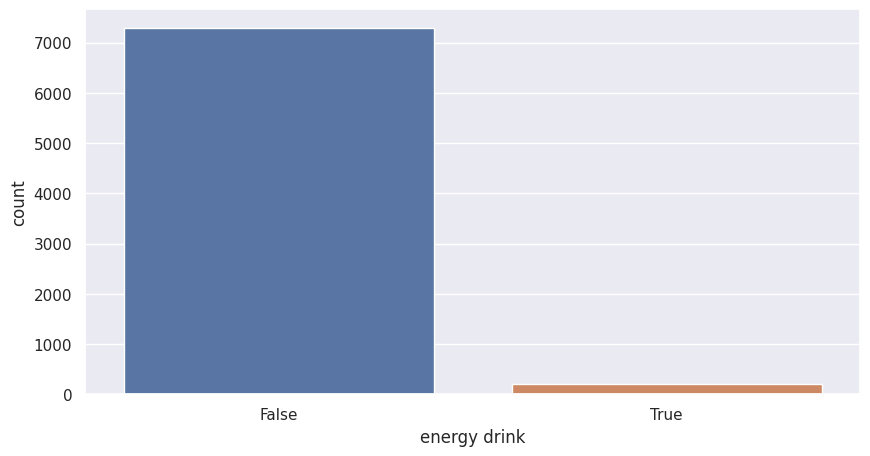

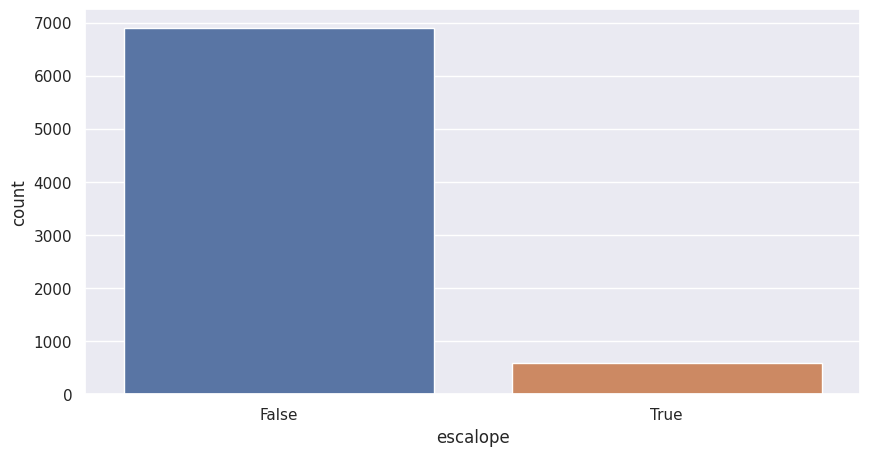

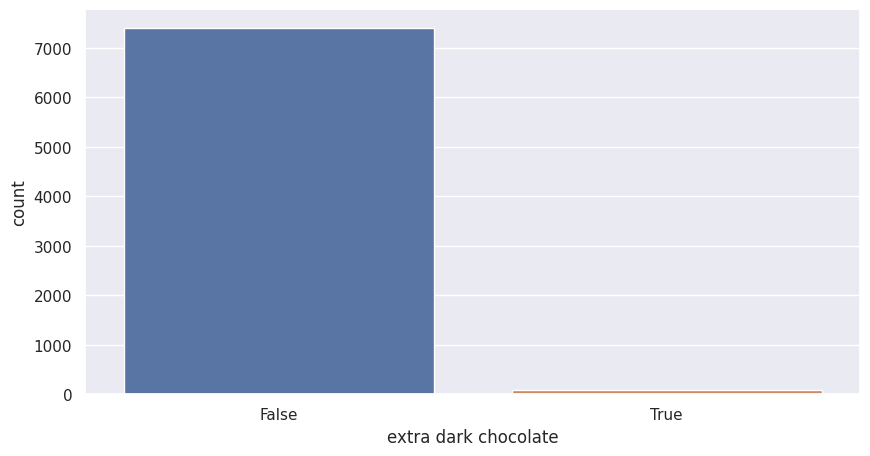

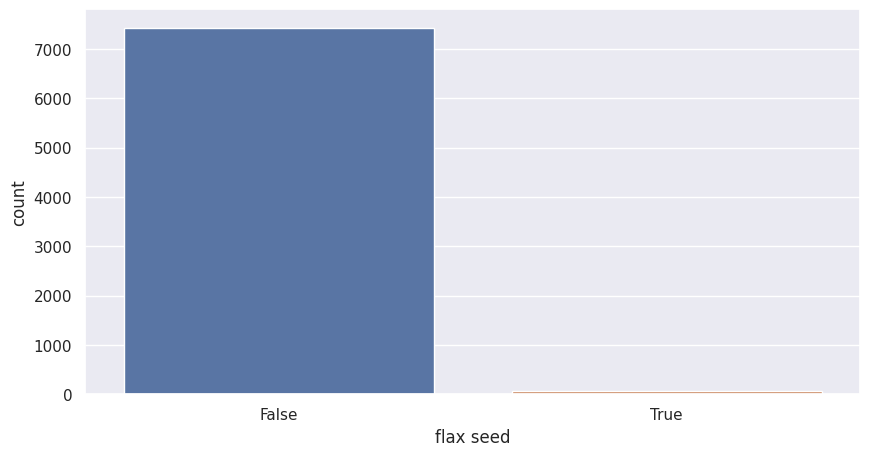

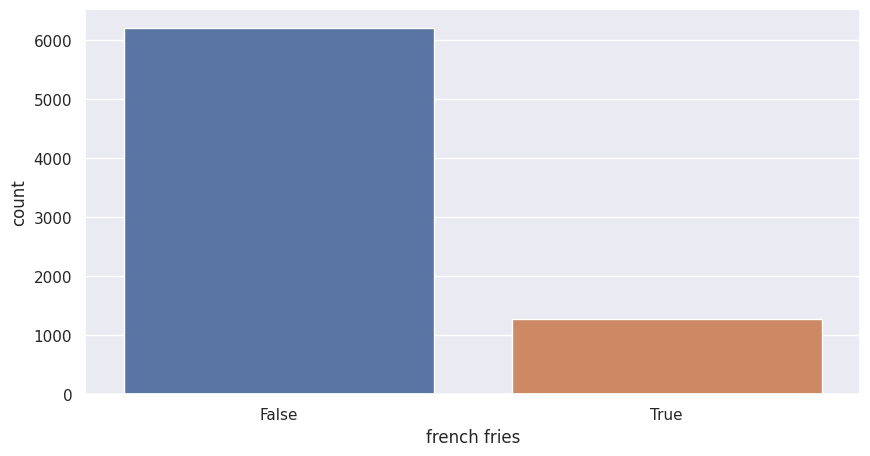

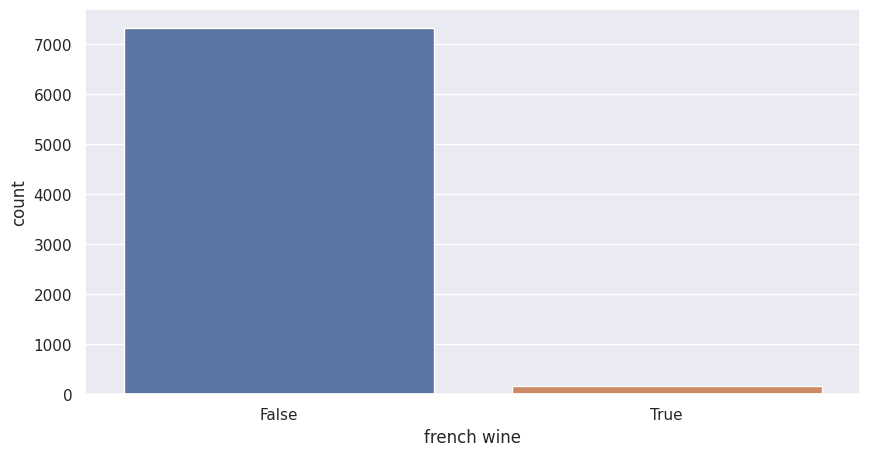

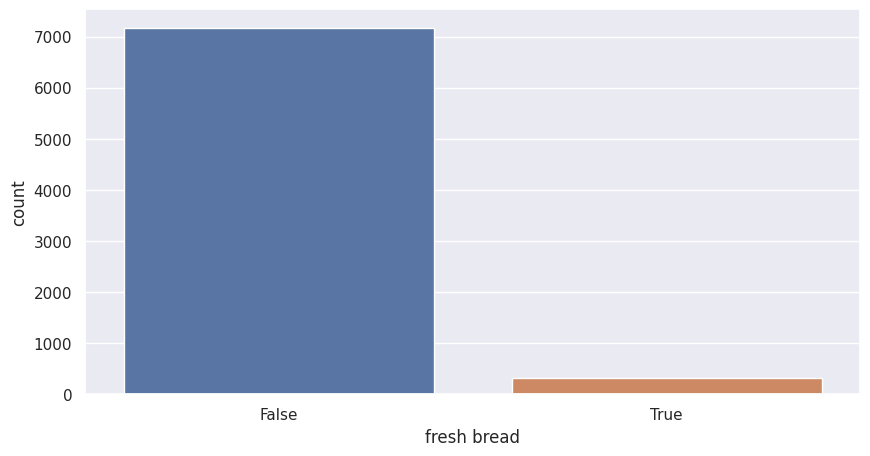

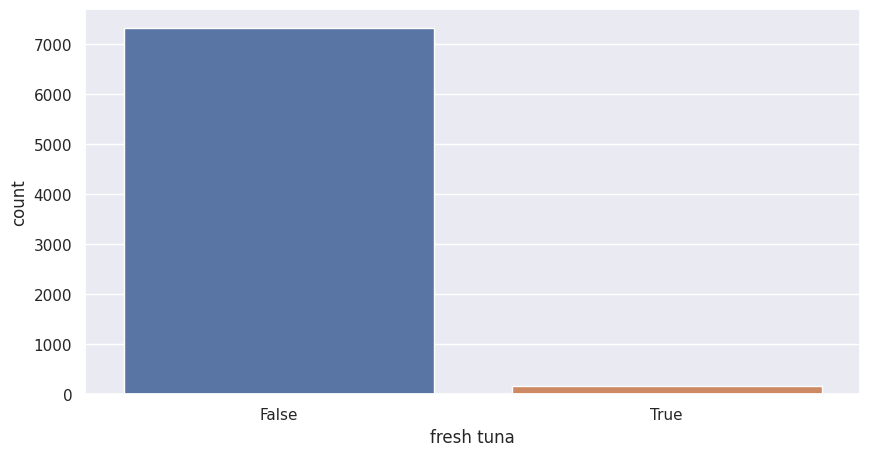

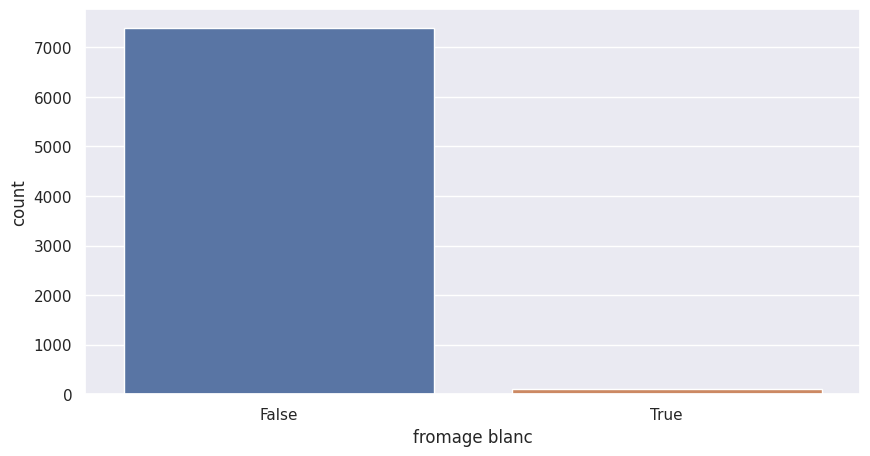

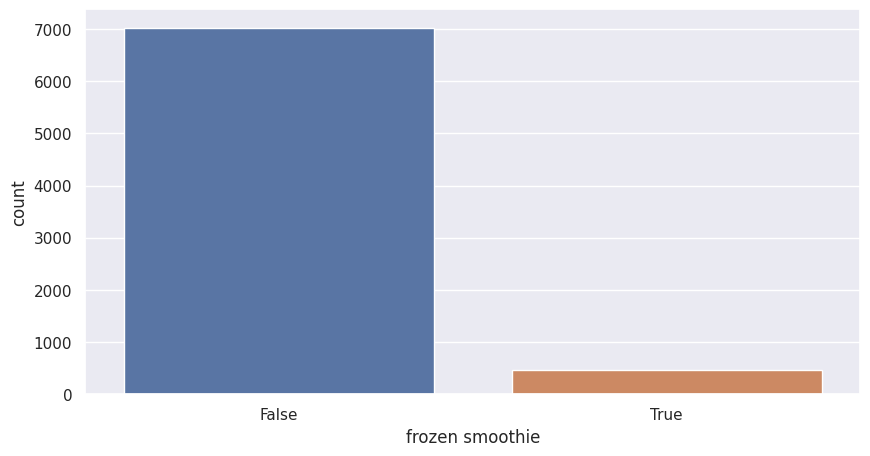

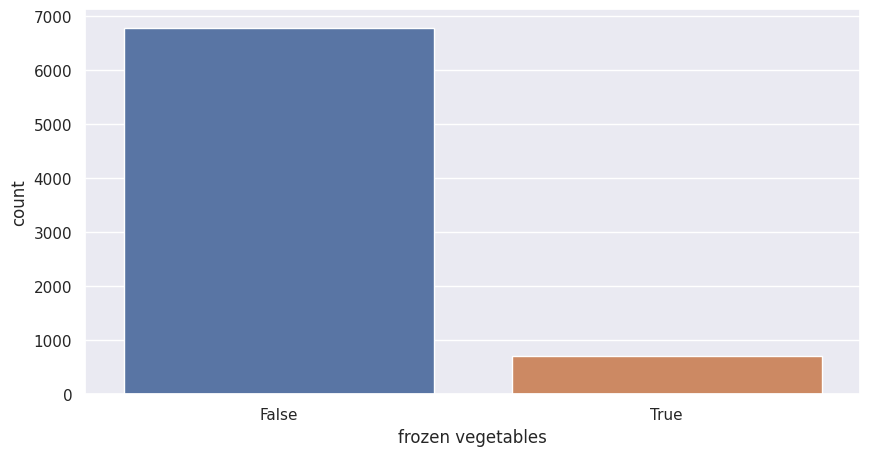

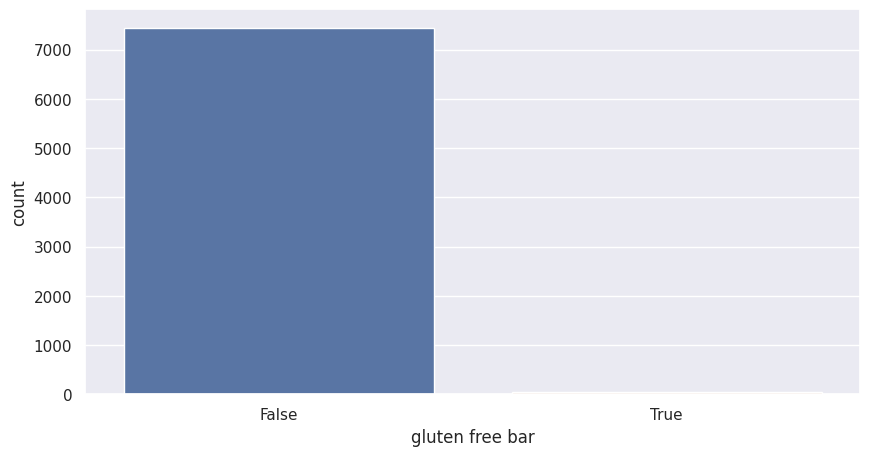

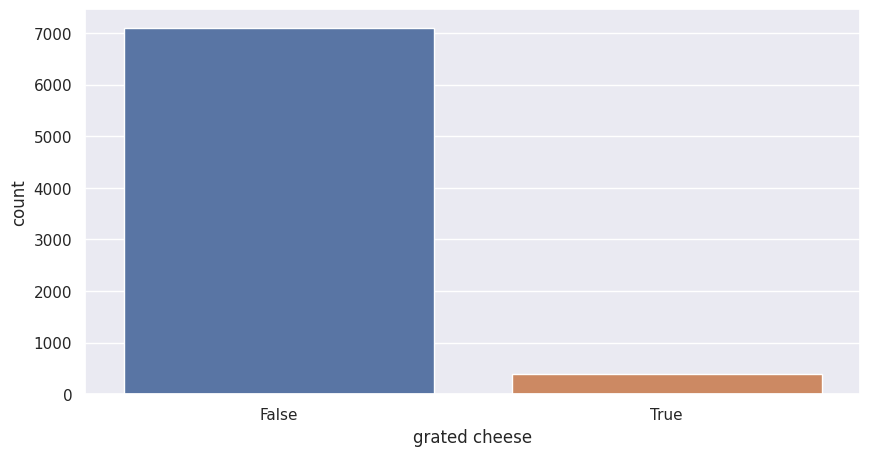

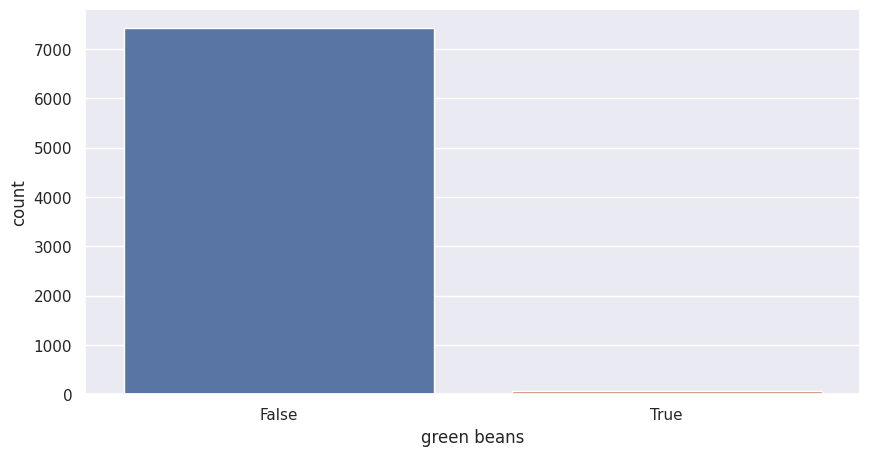

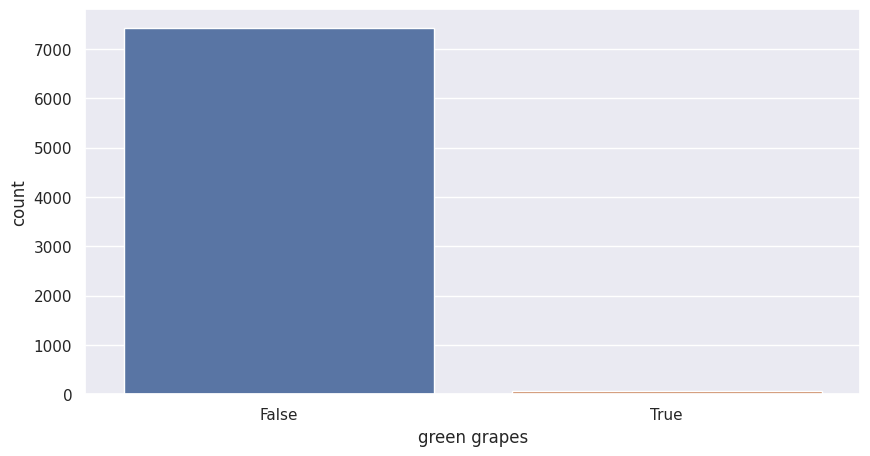

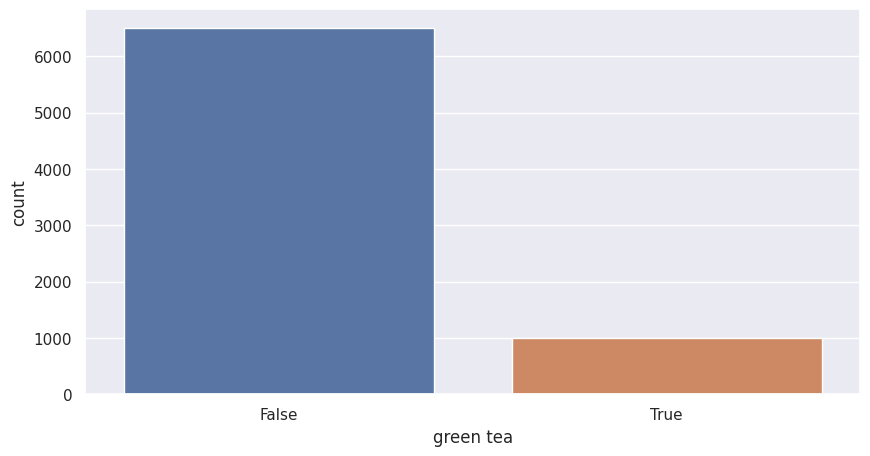

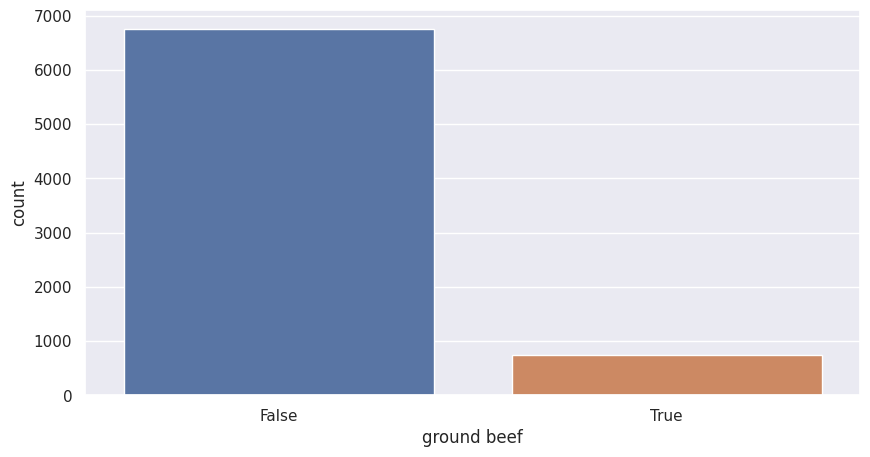

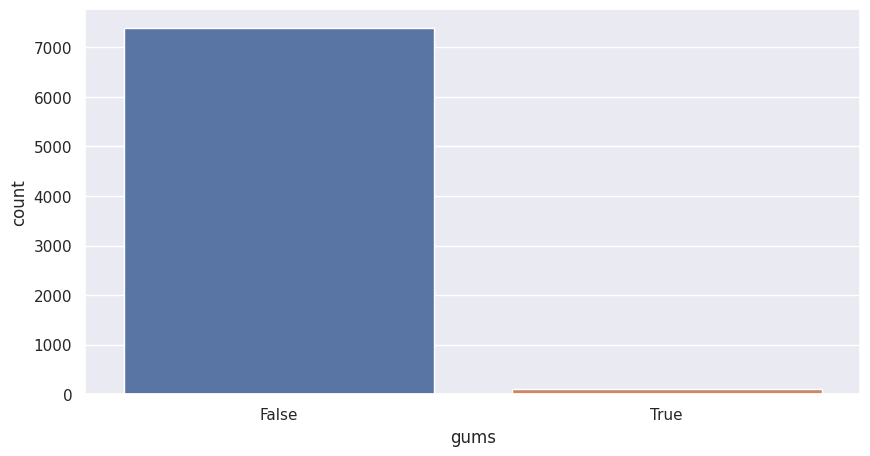

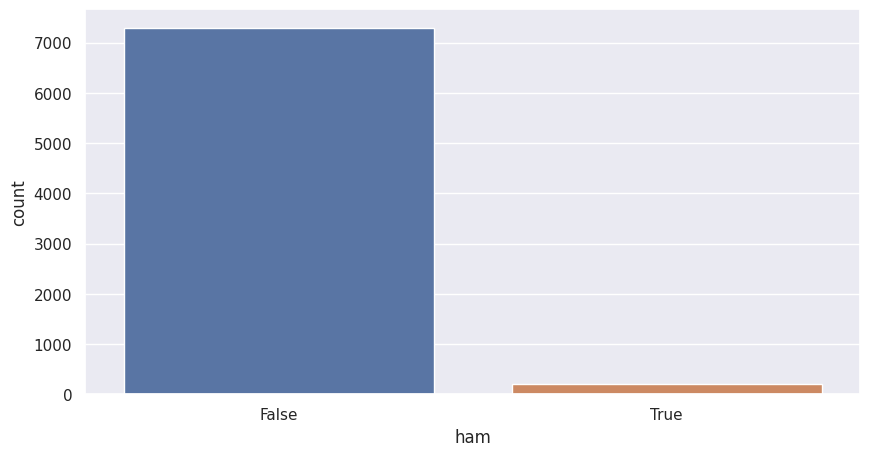

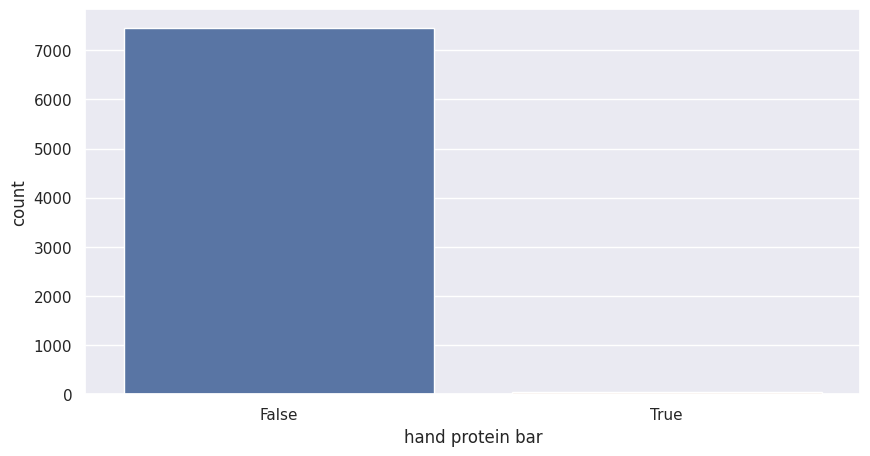

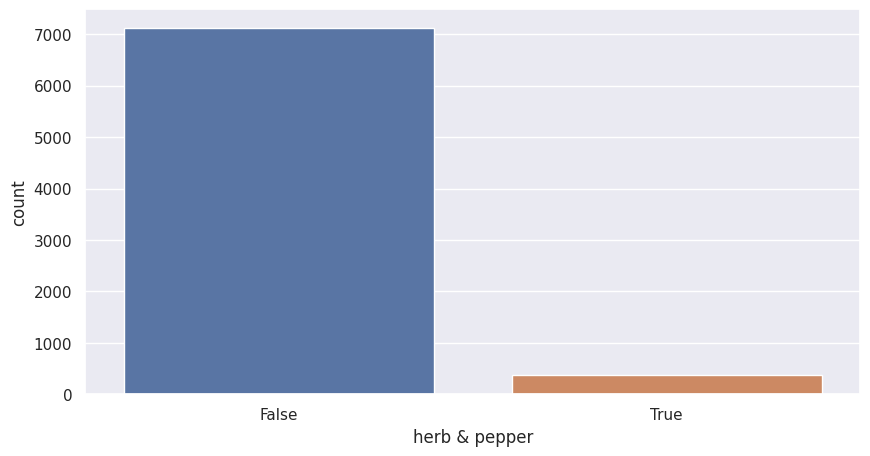

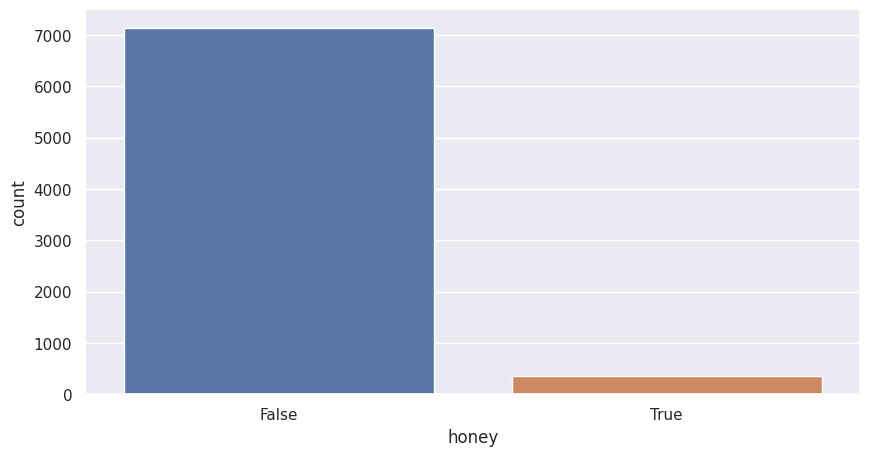

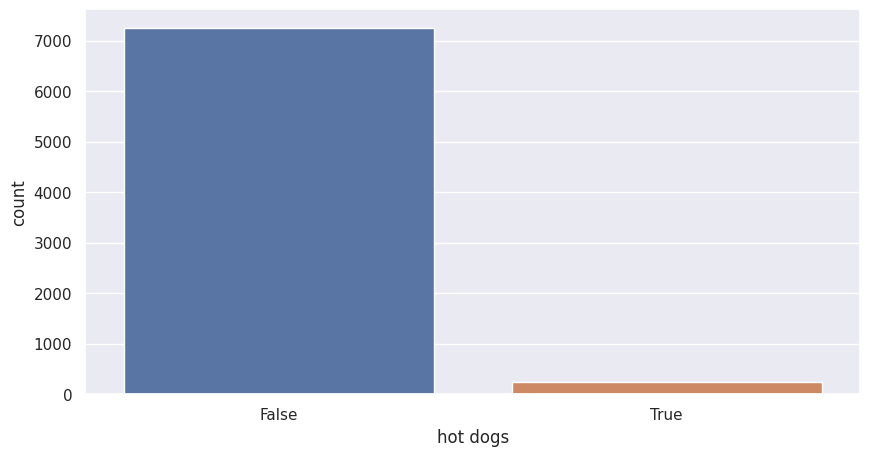

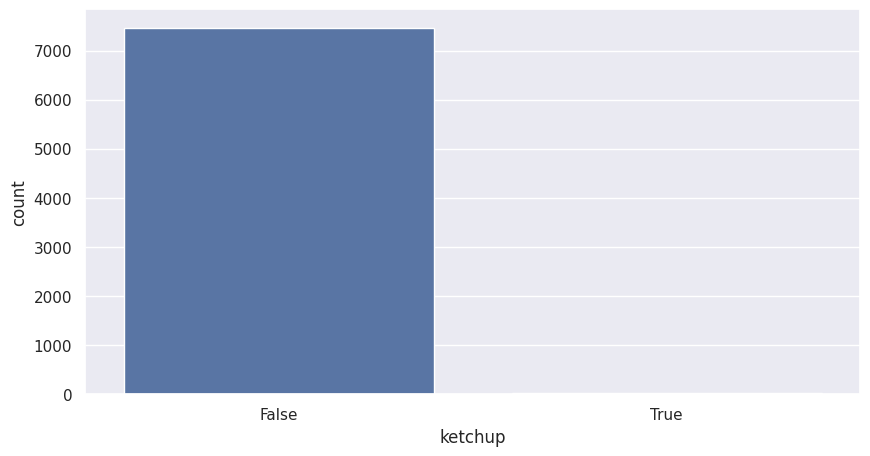

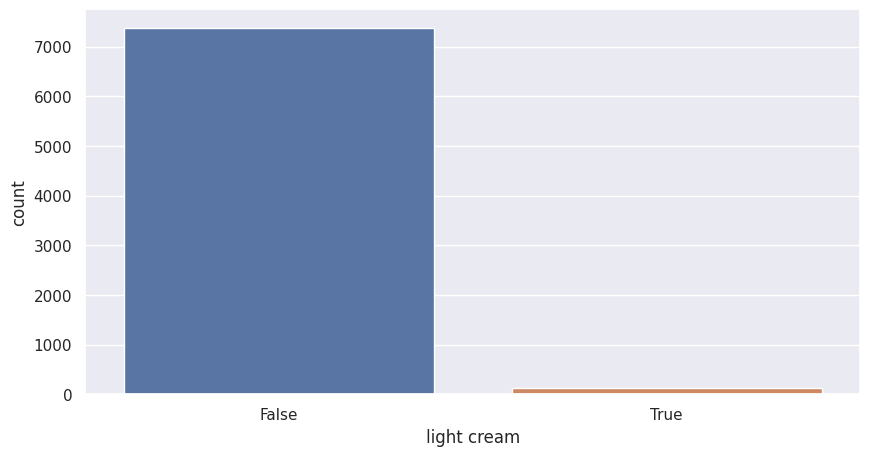

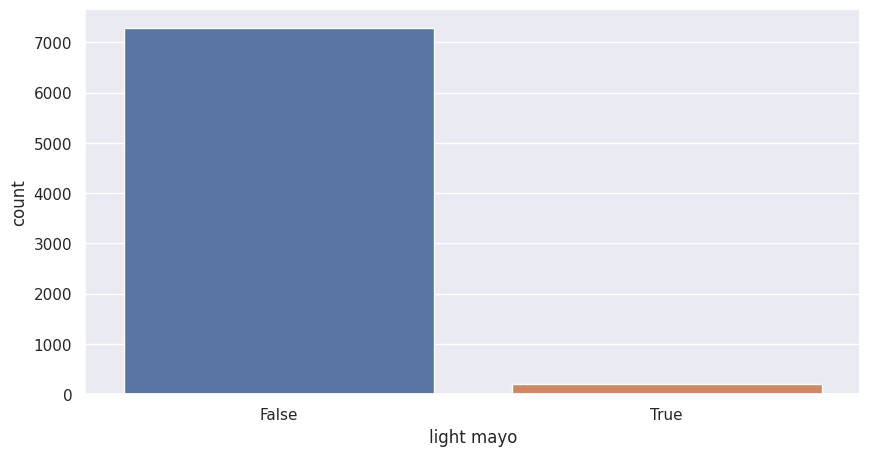

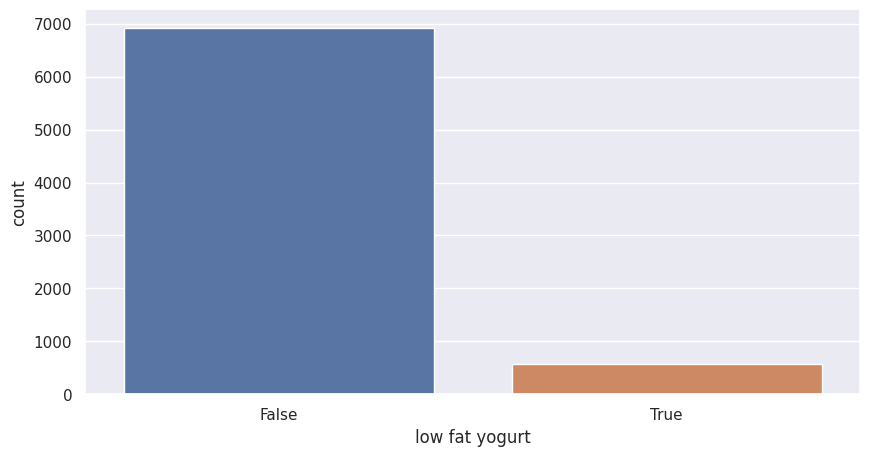

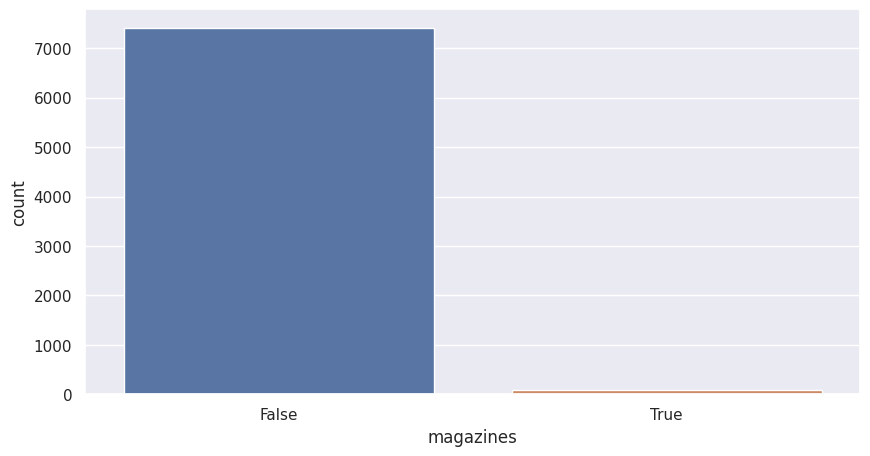

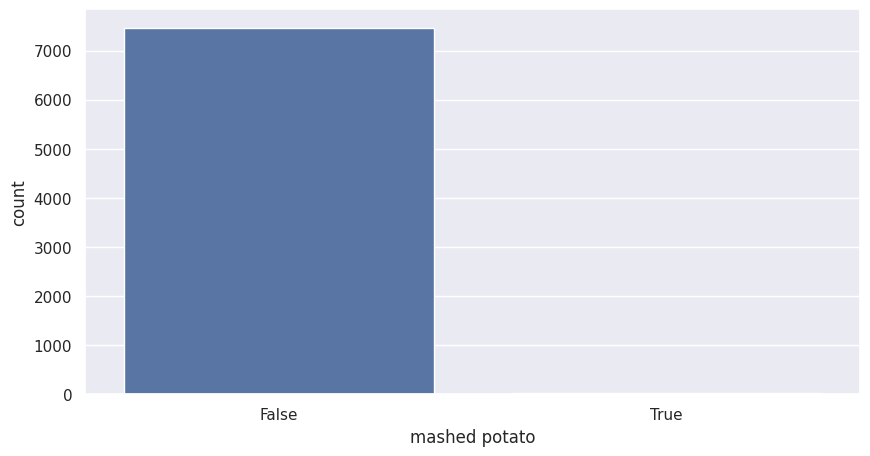

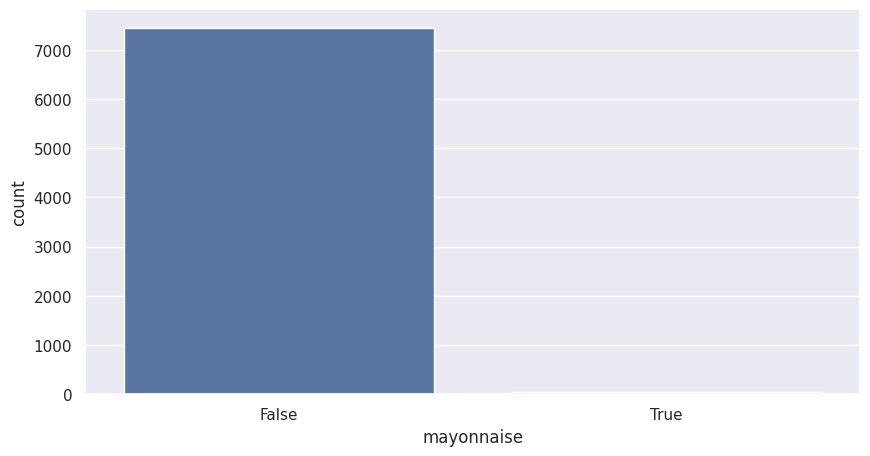

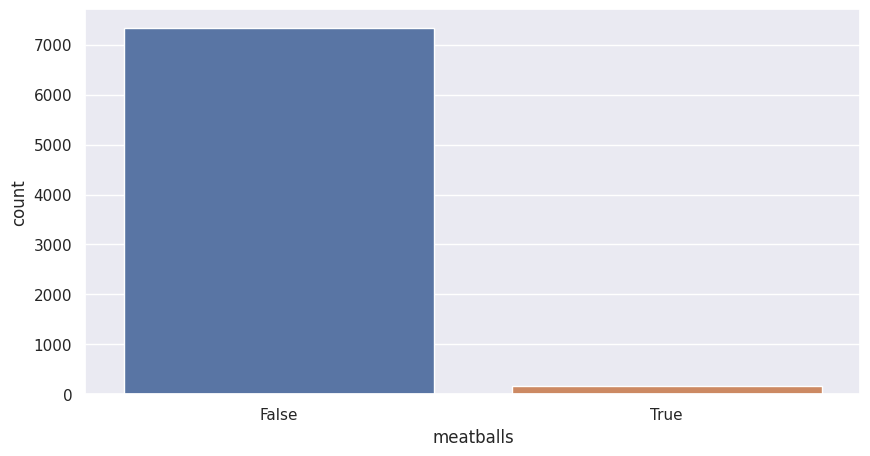

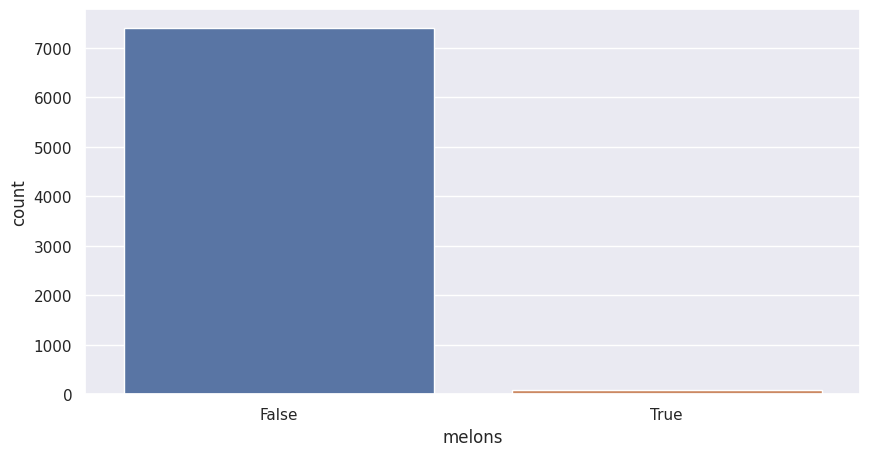

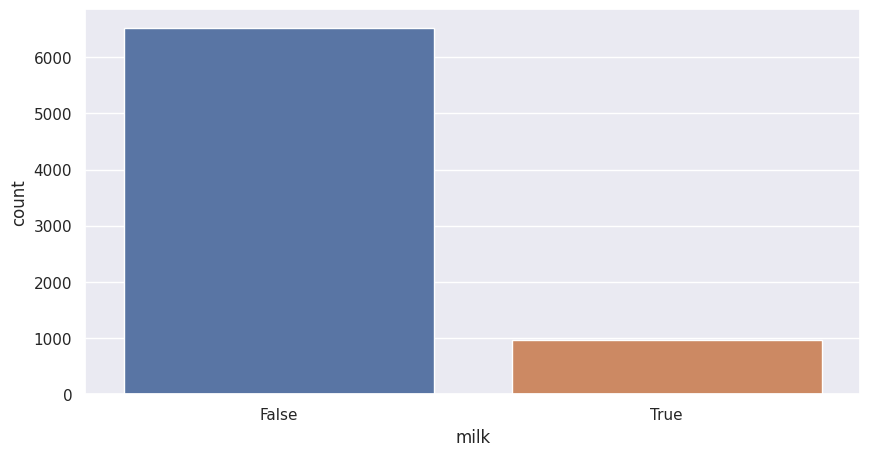

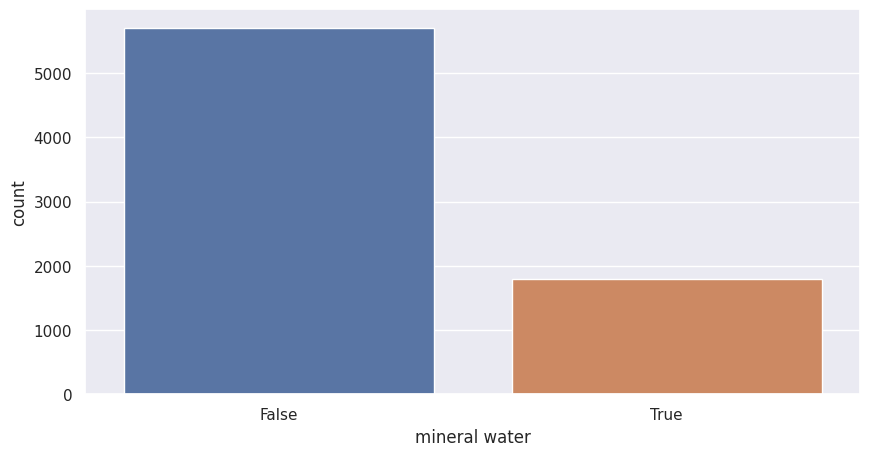

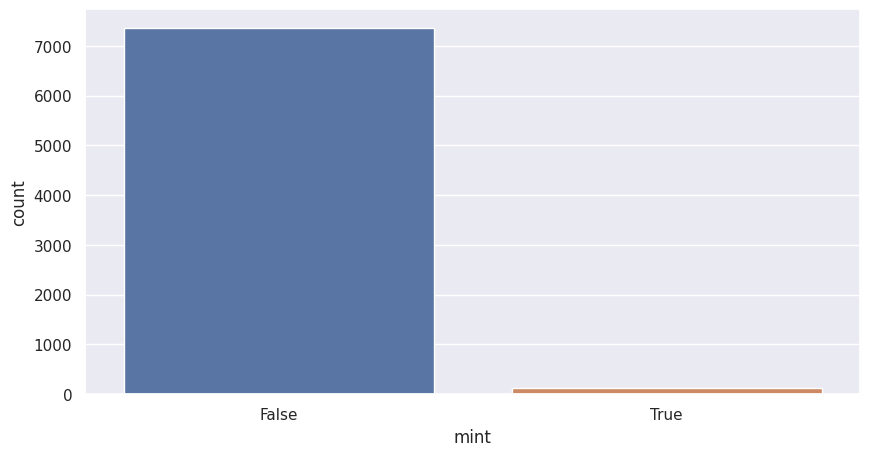

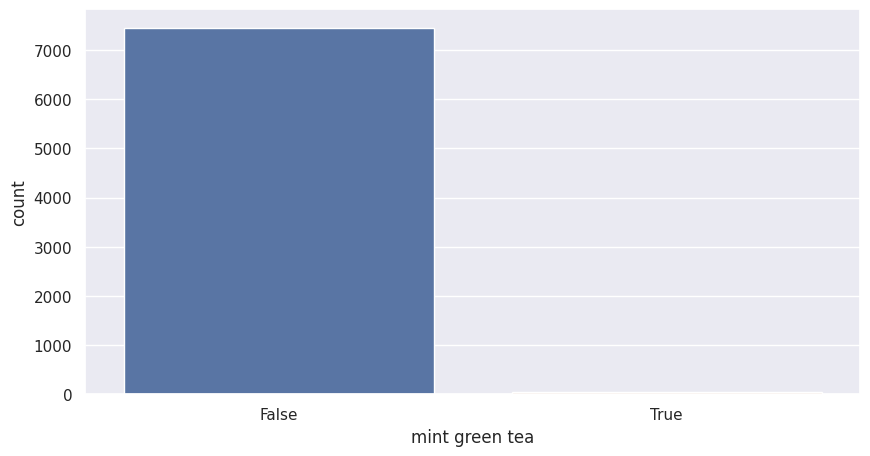

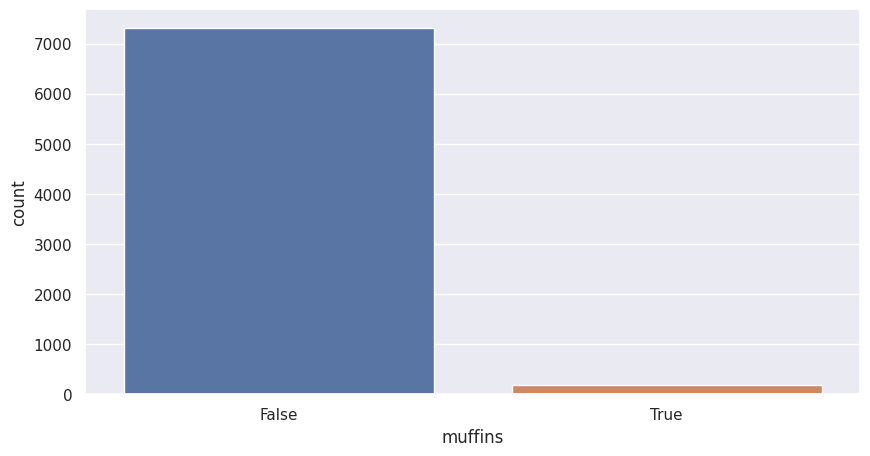

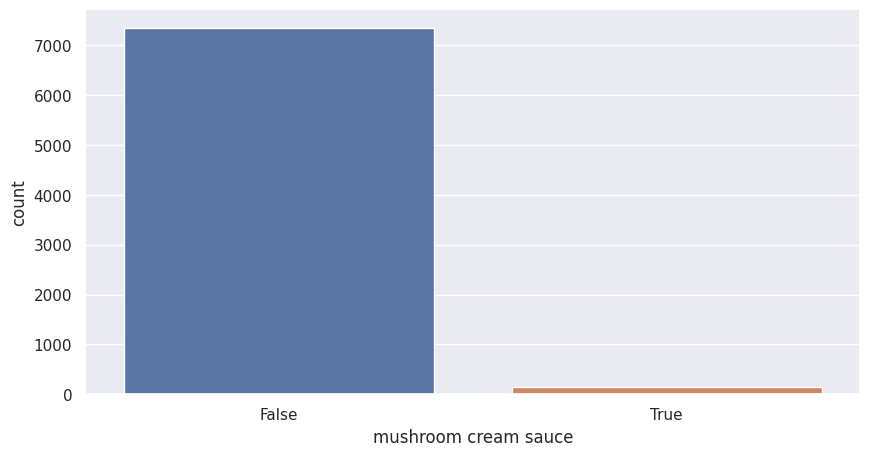

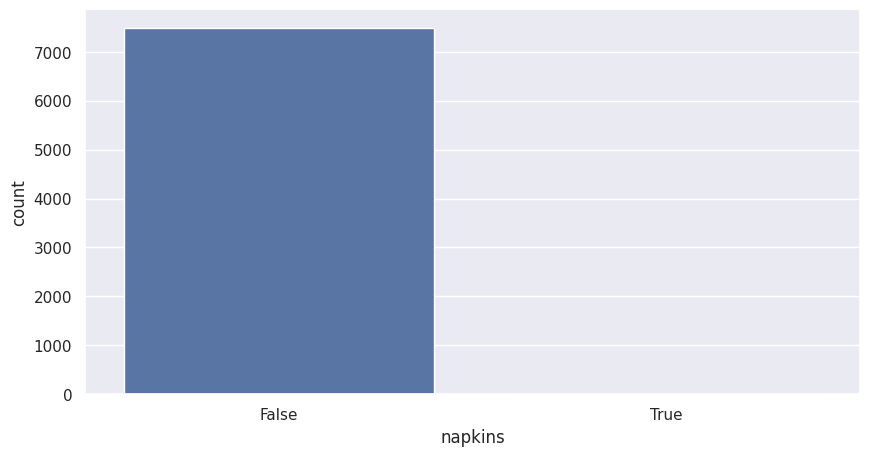

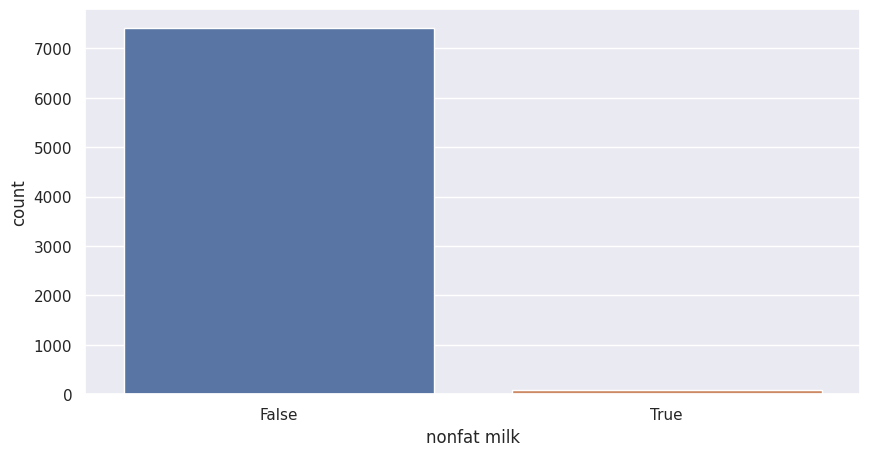

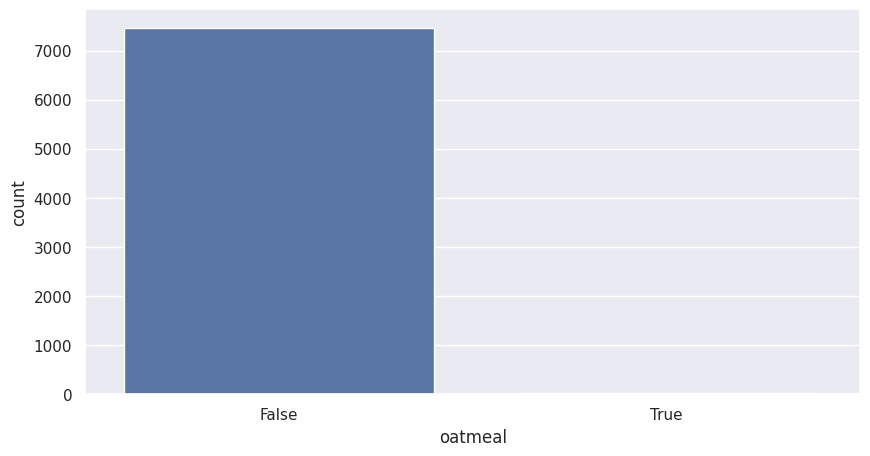

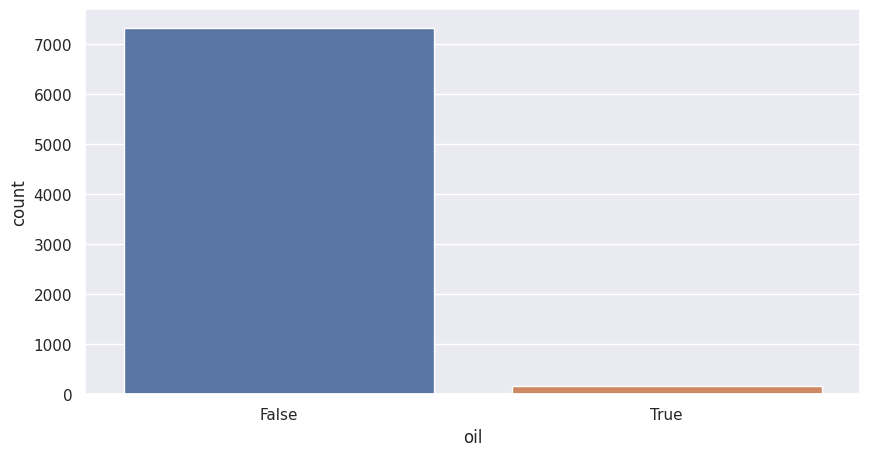

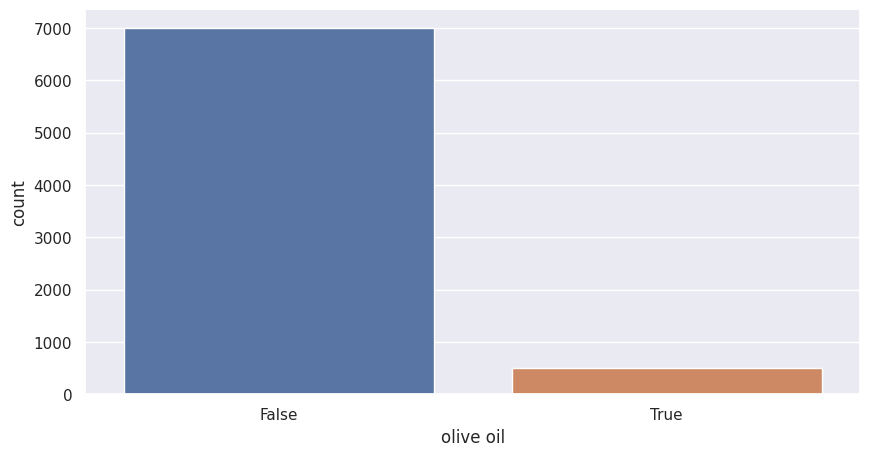

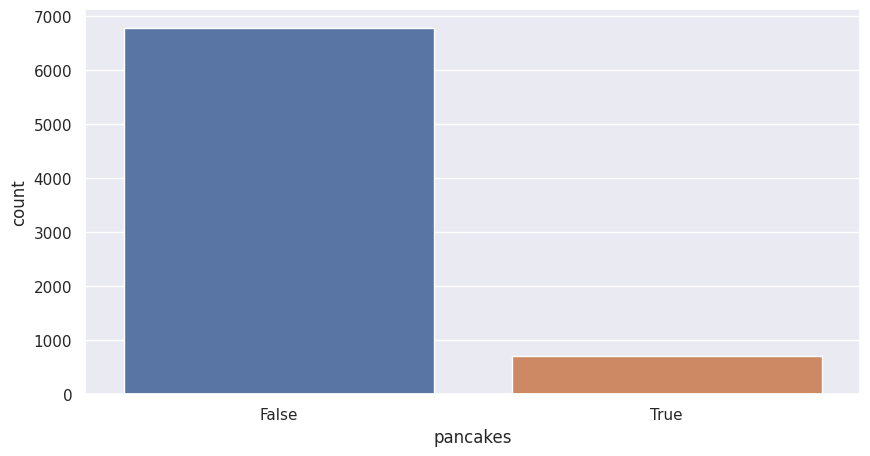

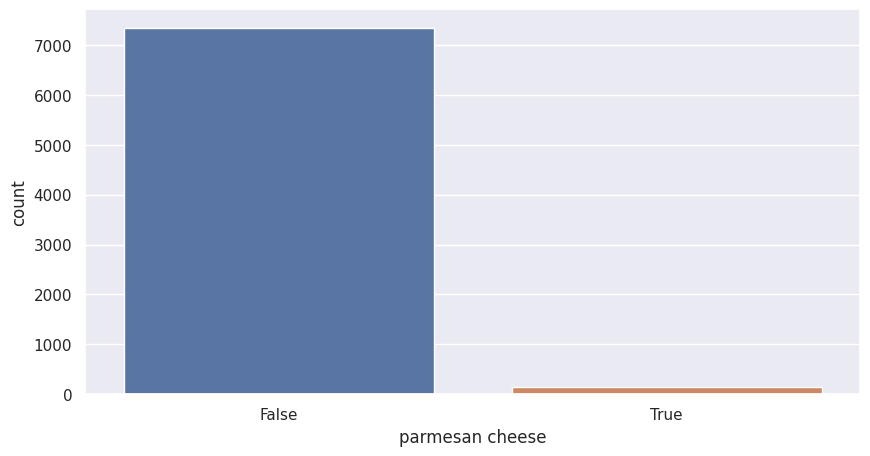

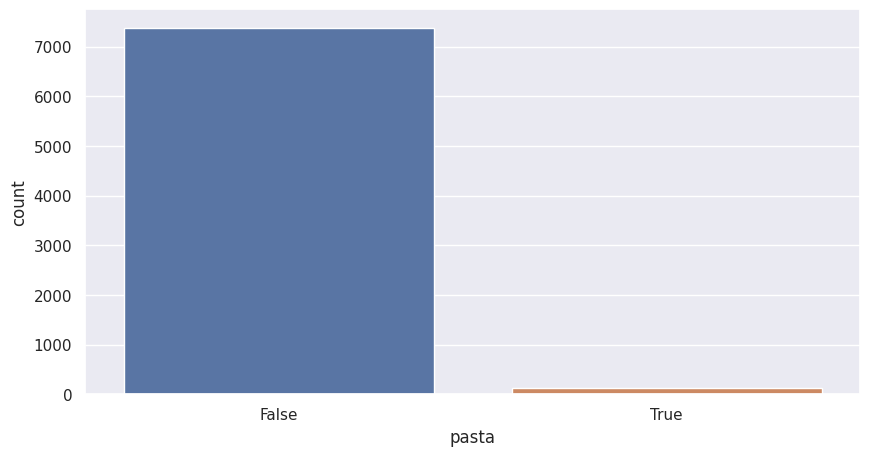

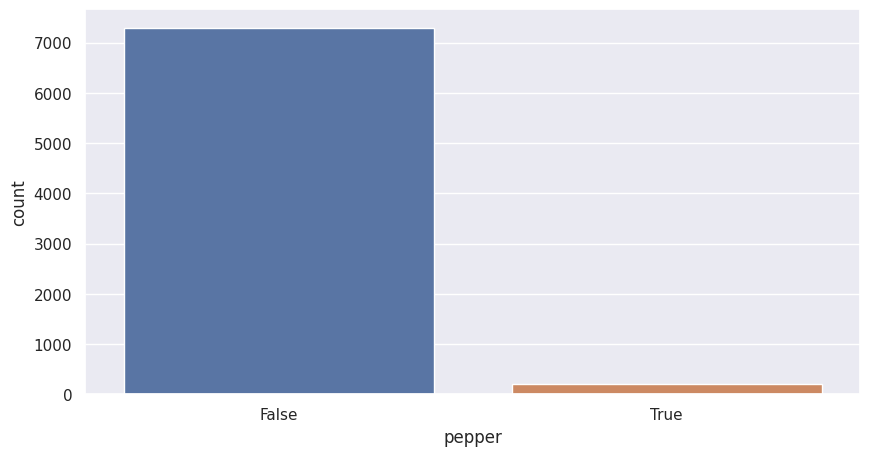

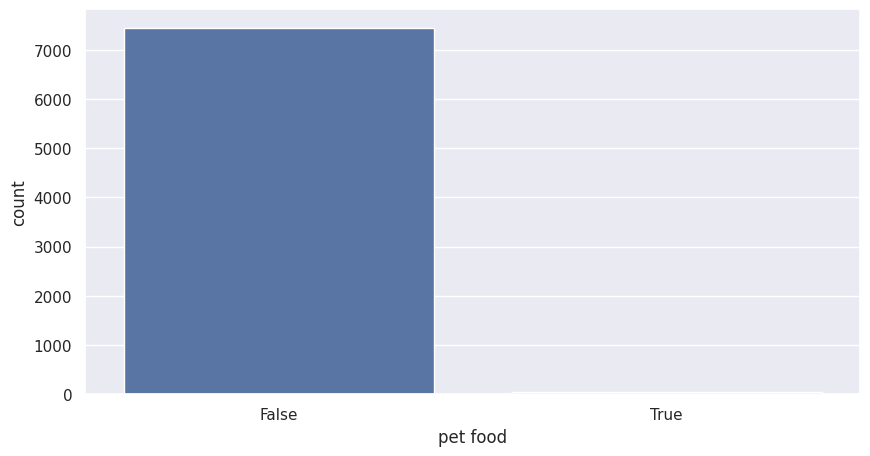

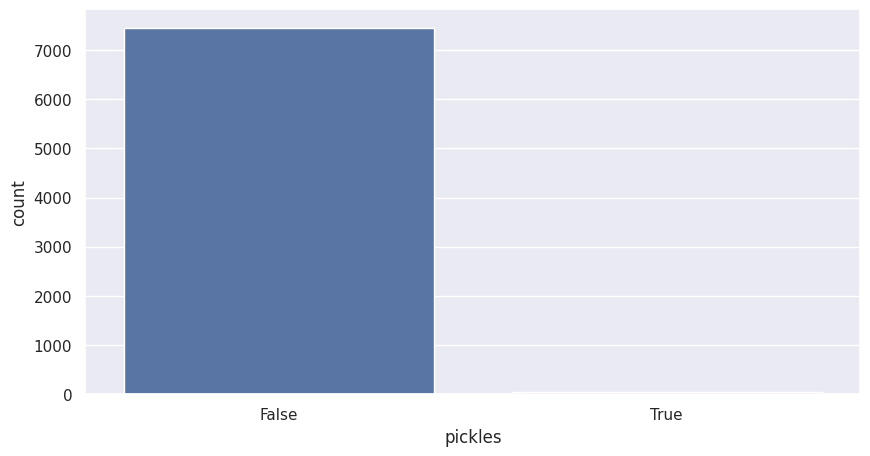

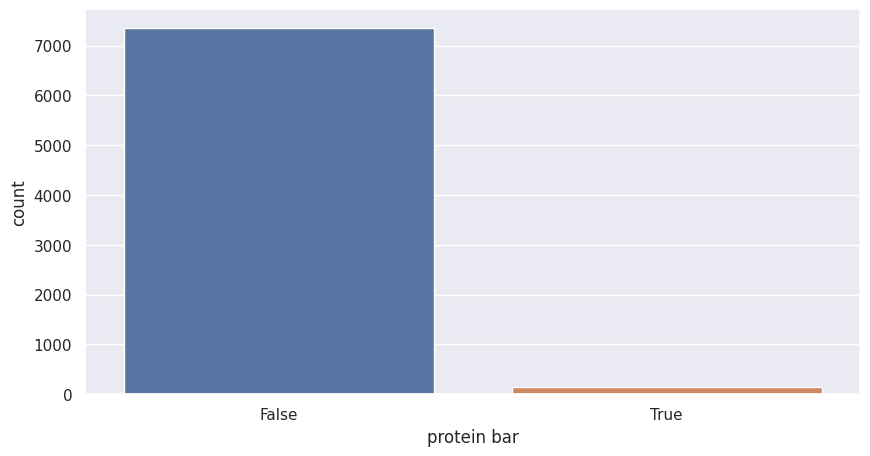

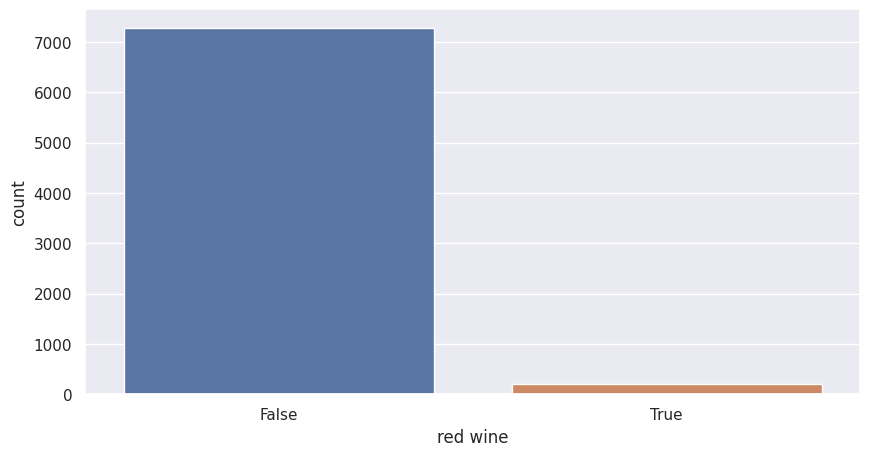

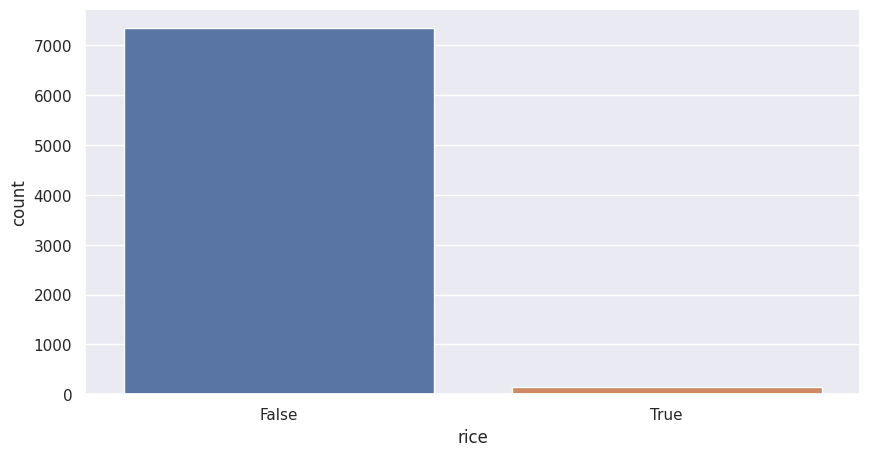

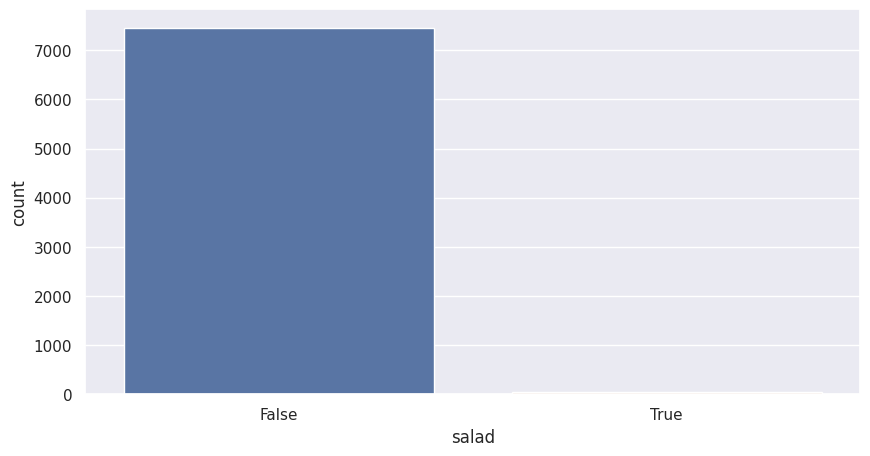

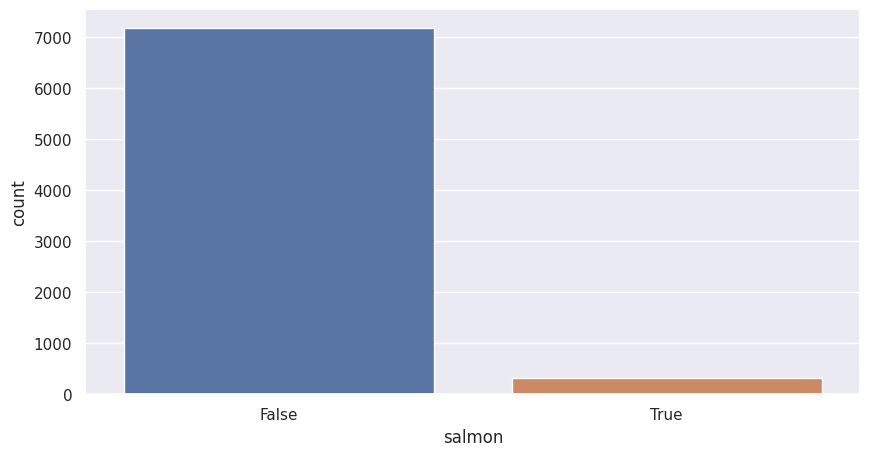

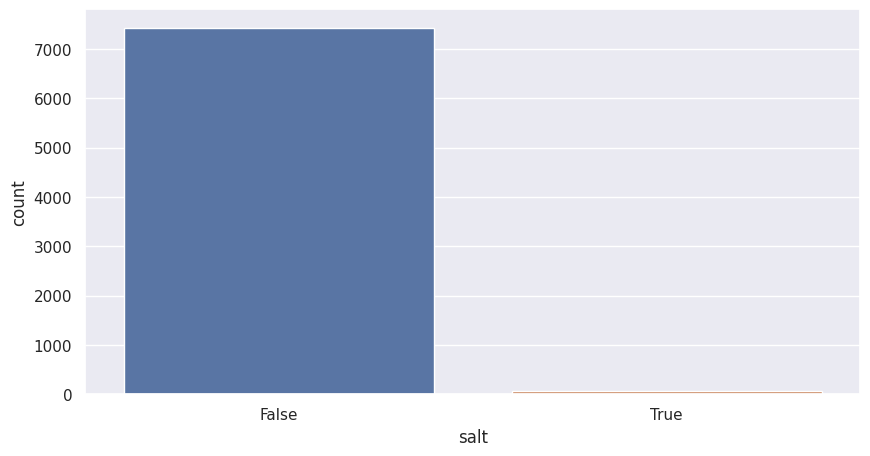

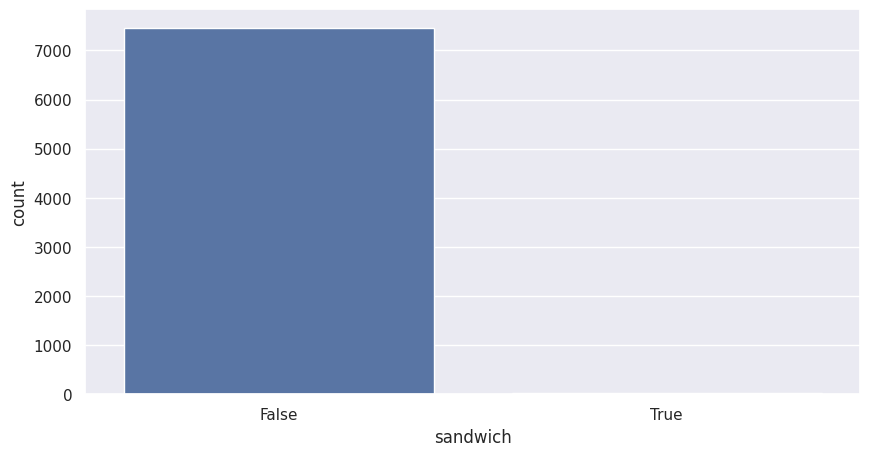

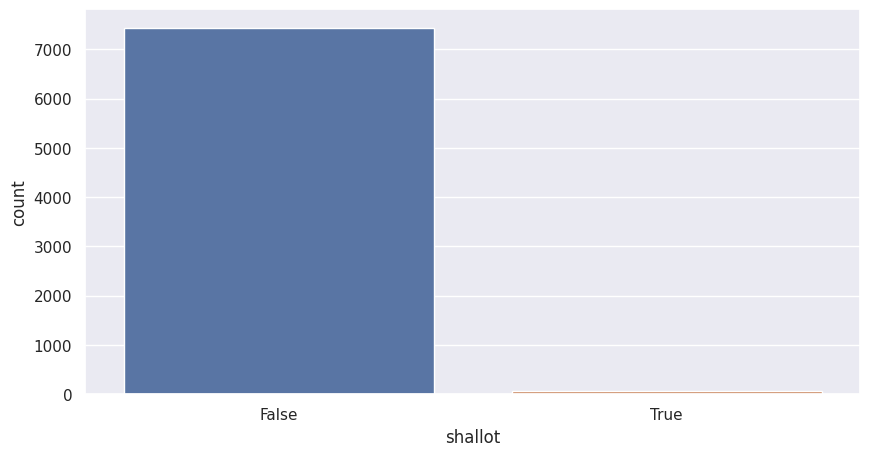

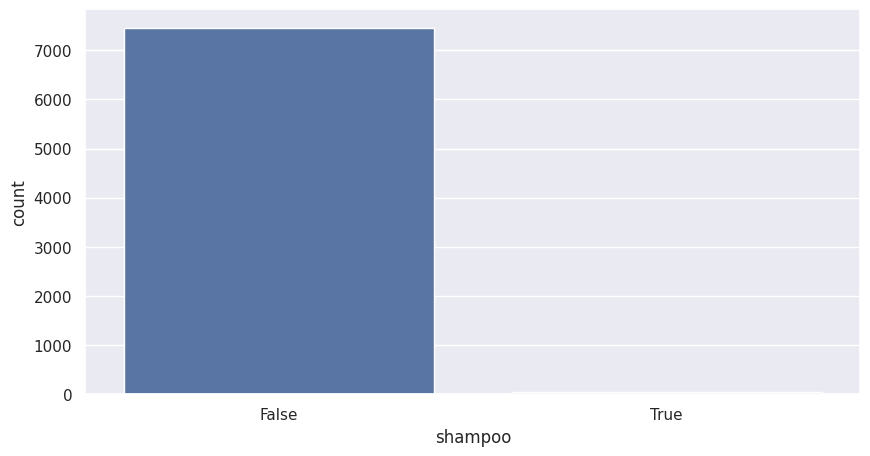

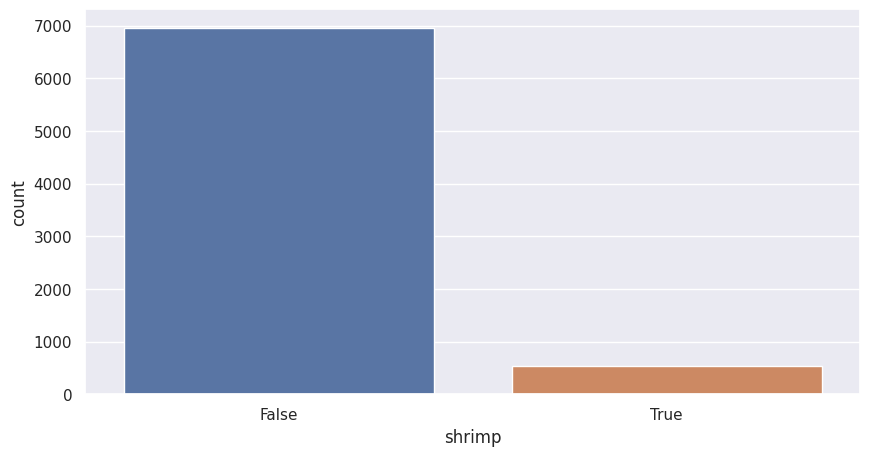

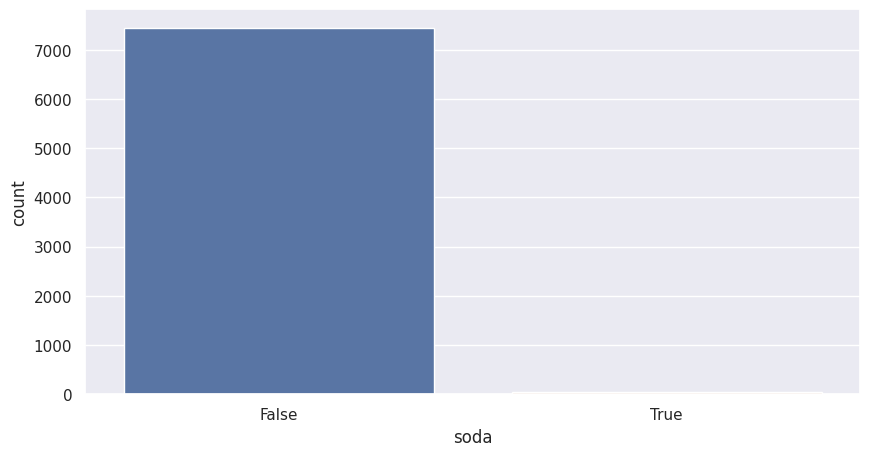

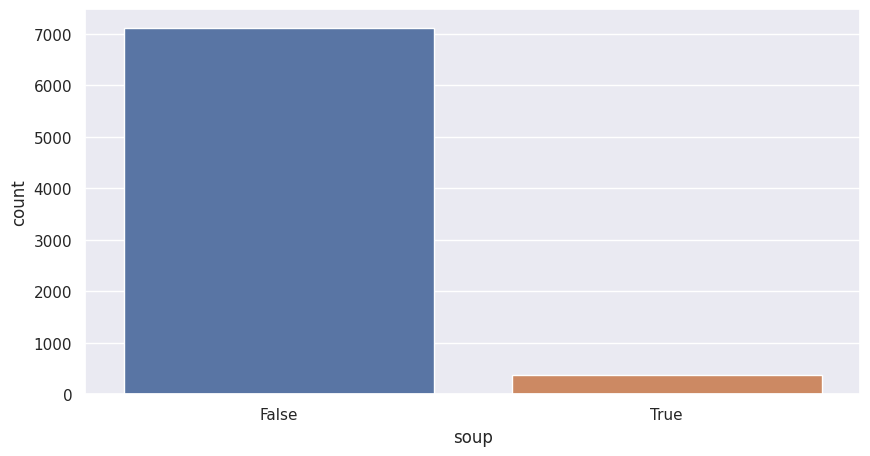

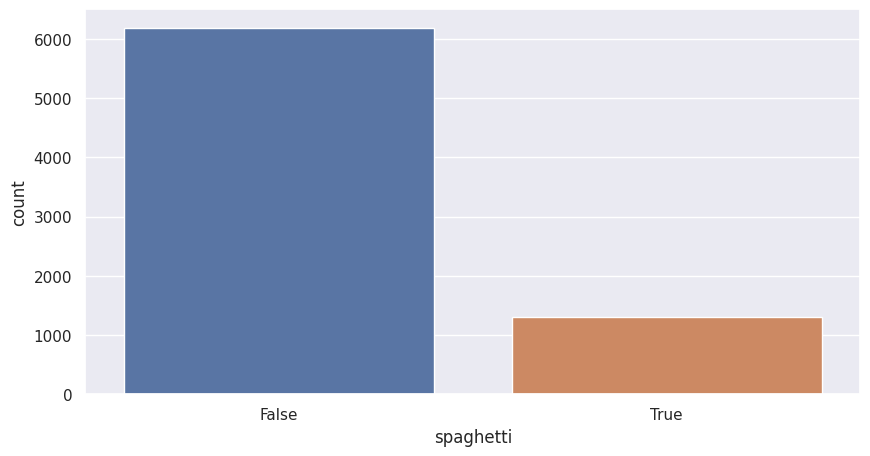

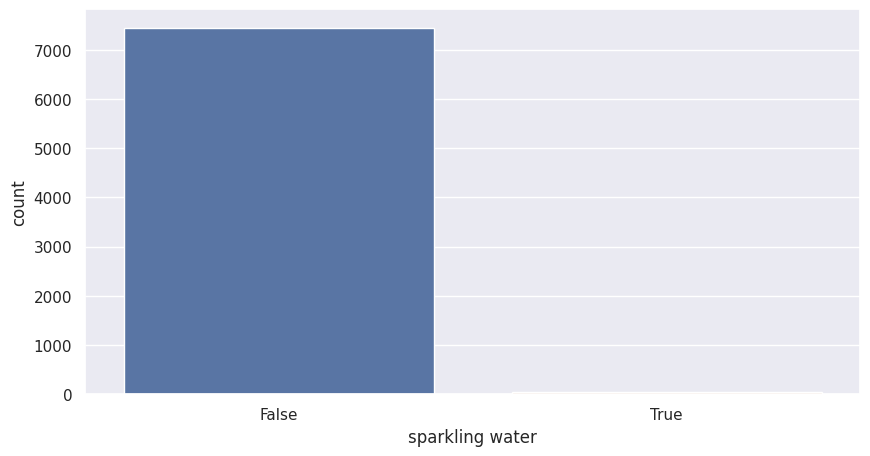

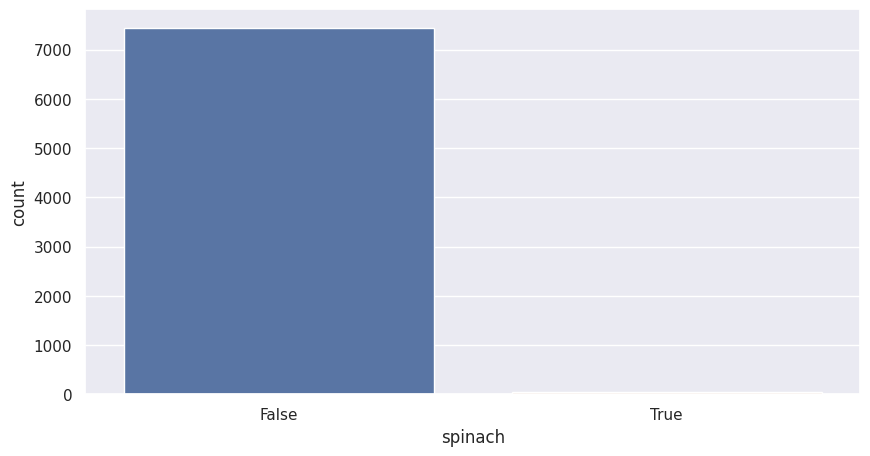

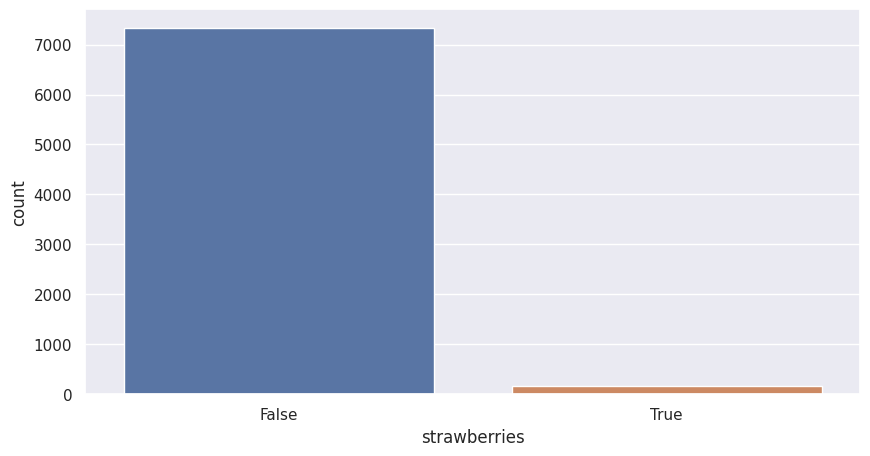

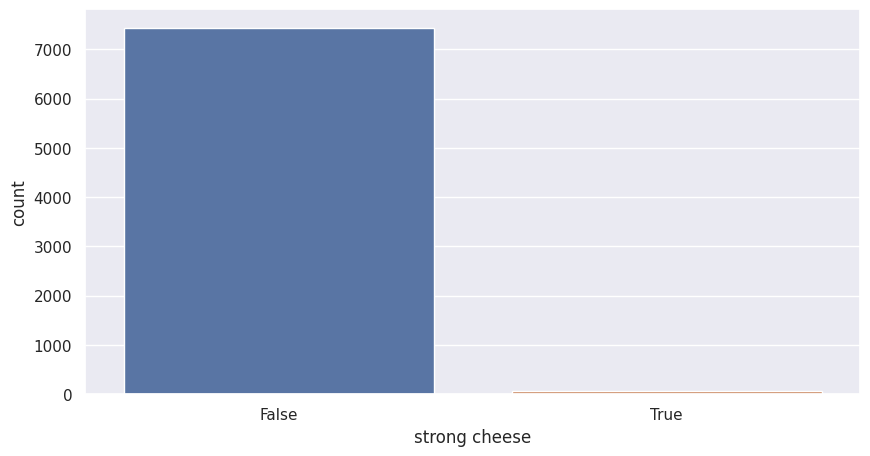

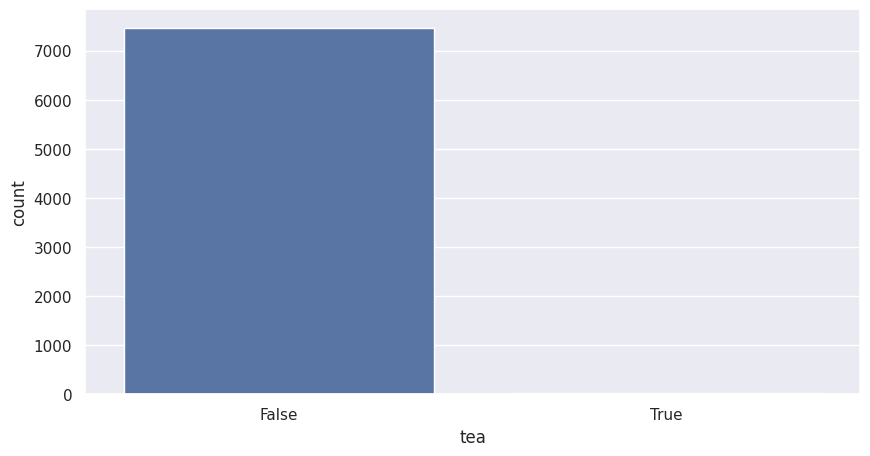

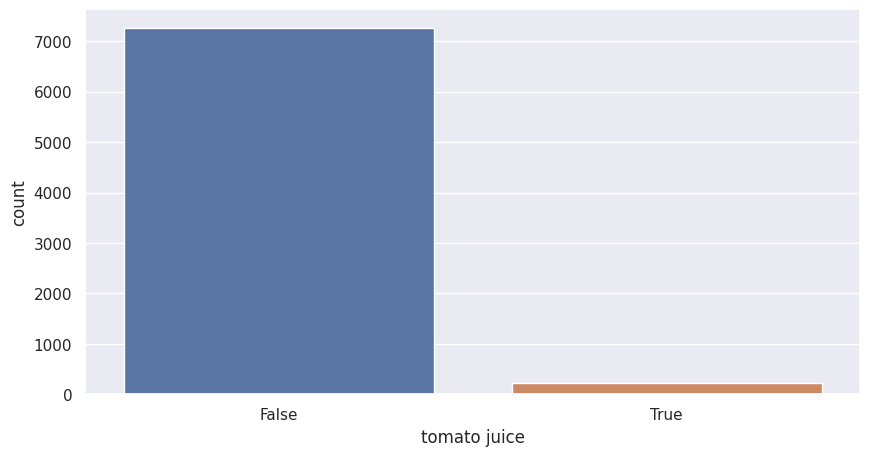

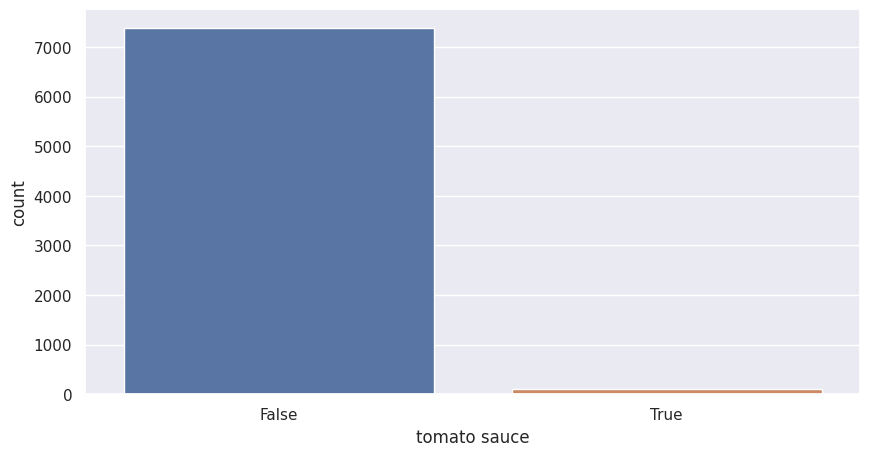

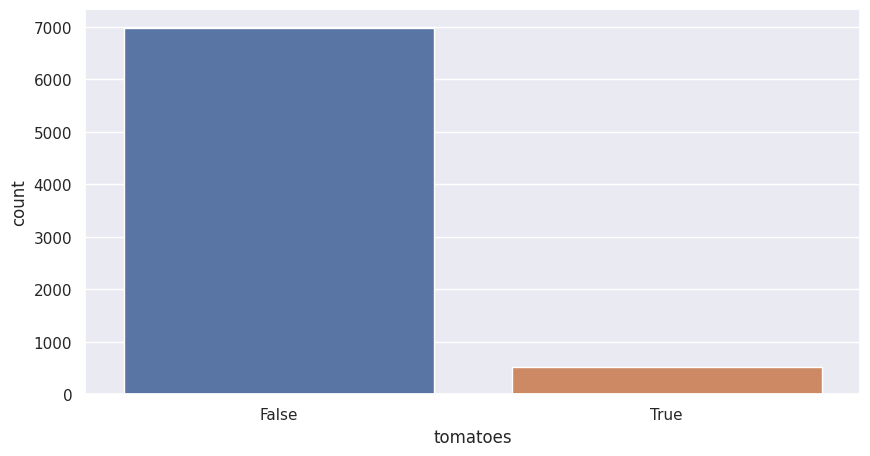

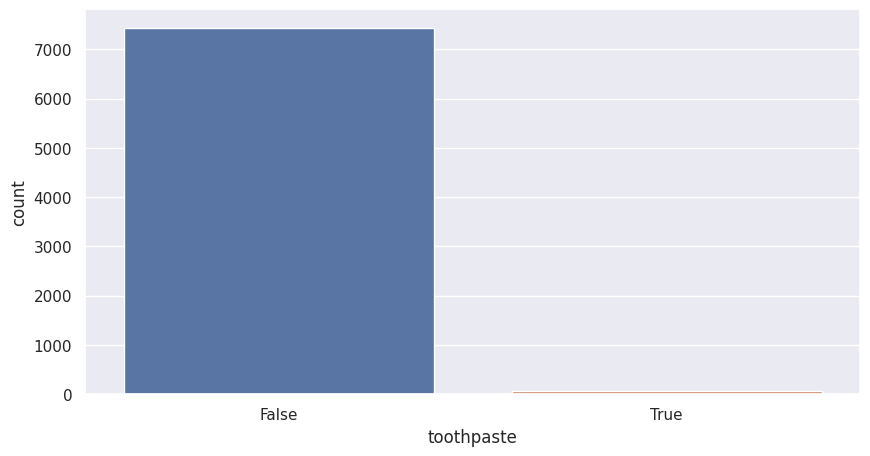

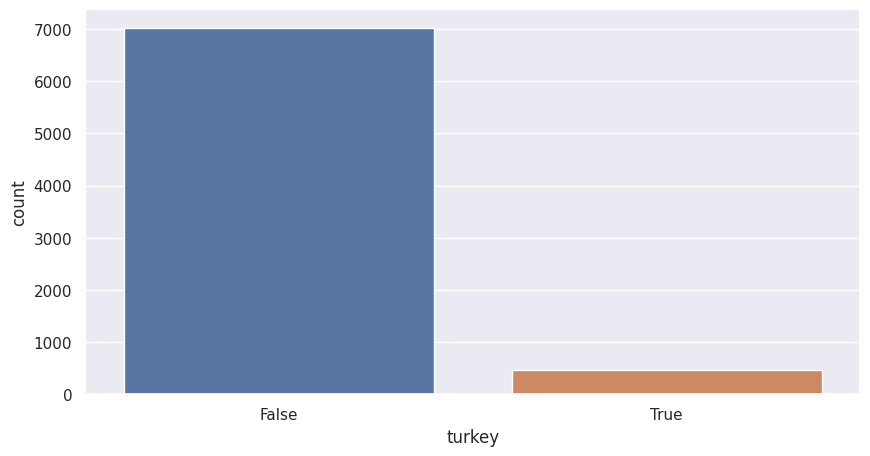

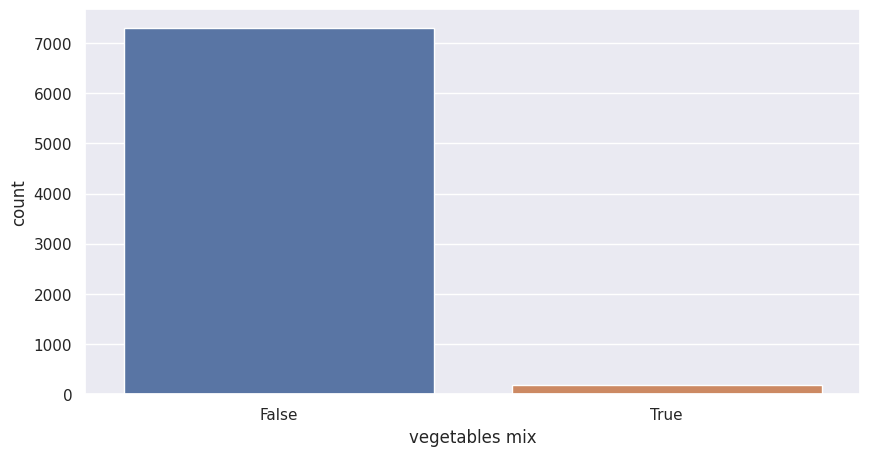

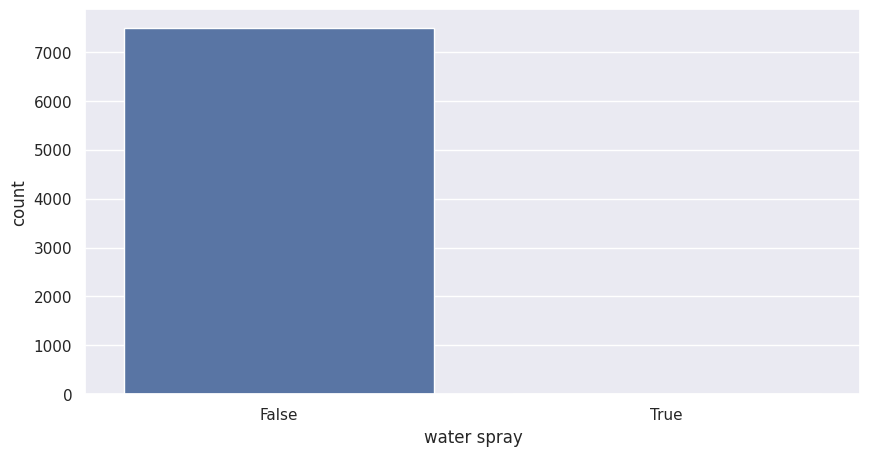

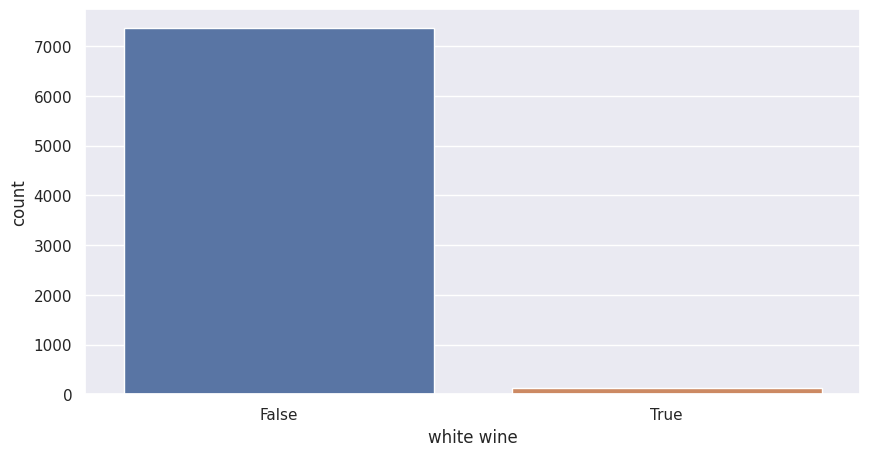

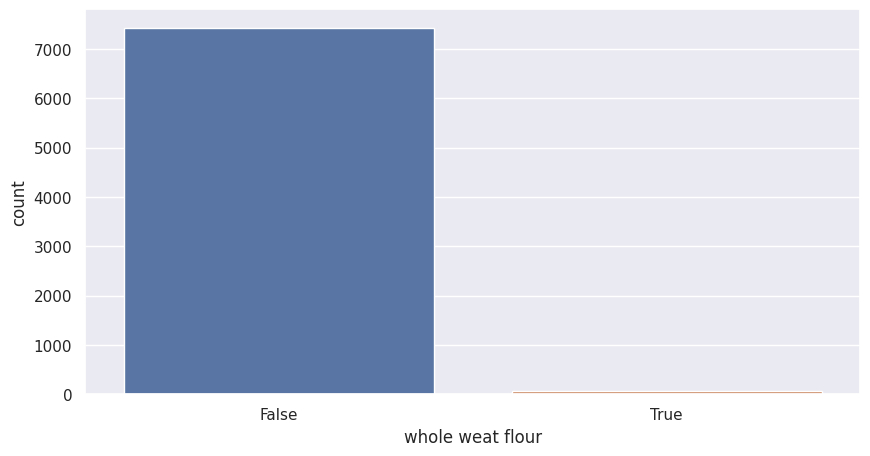

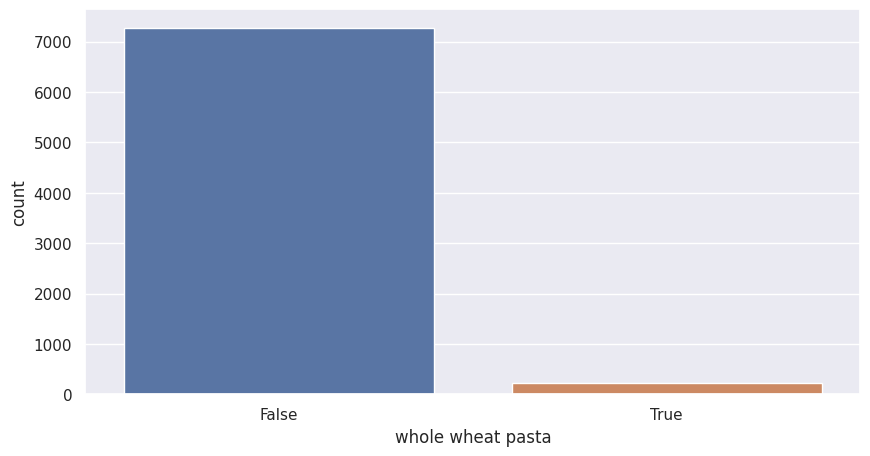

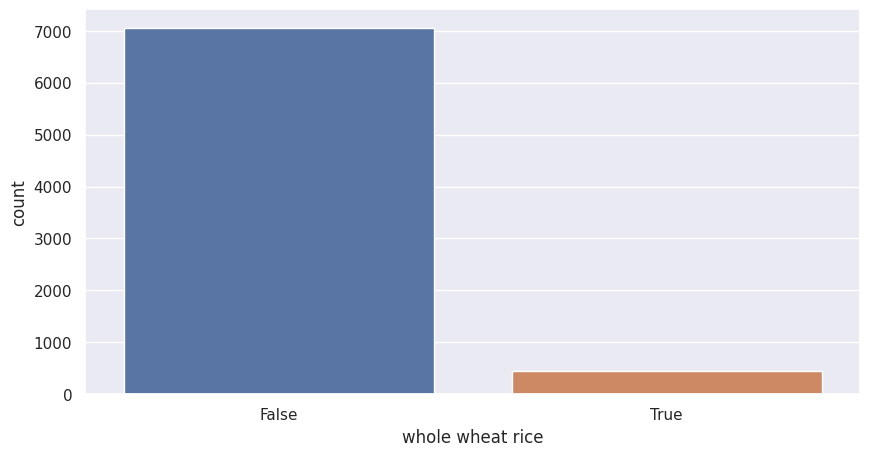

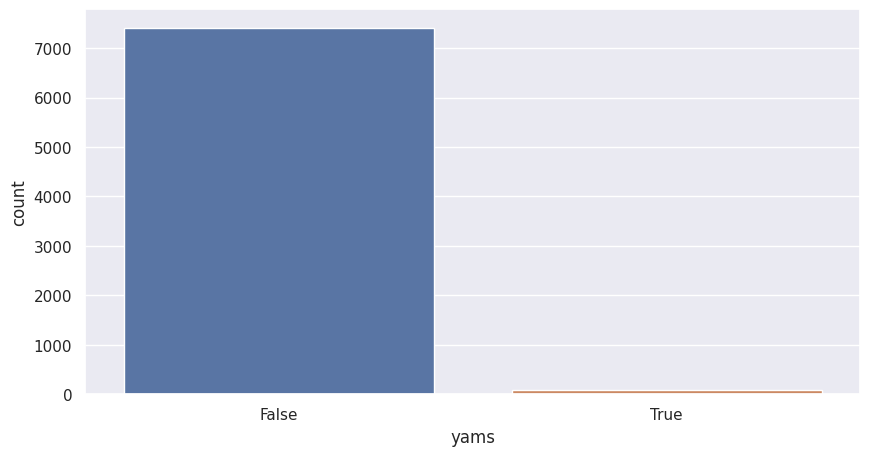

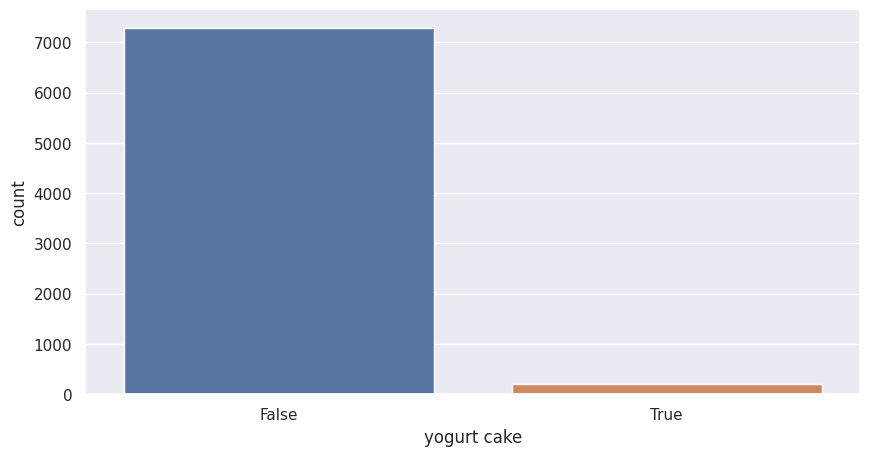

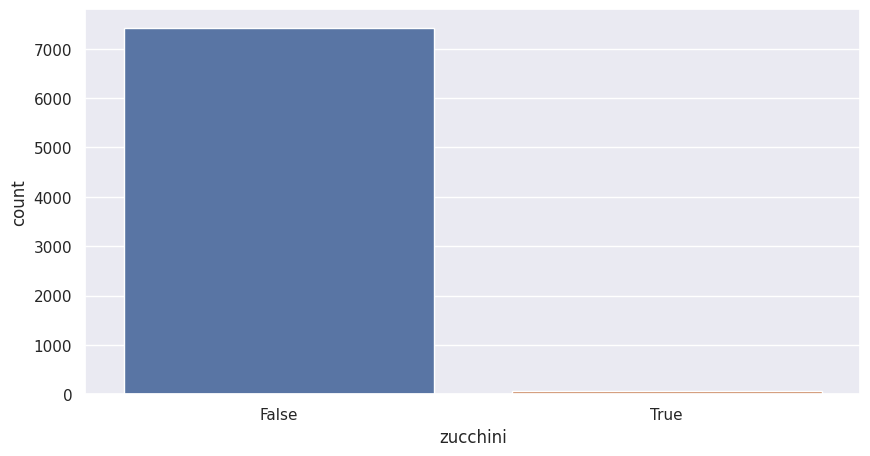

In [41]:
# visualisation
for col in df2.columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, data=df2)
  plt.show()

Nous pouvons remarquer que globalement une faible presence des produits par rapport l'ensemble des transactions.

Seules les articles  'chocolate', 'eggs,'french fries','green tea','milk','mineral water'et 'spaghetti' ont eu au moins 1000 présences.

In [21]:
# General Exploration for Categorical Variables:
def cat_summary(dataframe, plot=False):
    #for col_name in dataframe.columns:
    for col_name in dataframe.columns:
        print("############## Unique Observations of items ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique()))

        print("############## Frequency of items ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts()/len(dataframe)}))
        if plot == True:
            rgb_values = sns.color_palette("Set2", 6)
            sns.set_theme(style="darkgrid")
            ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette=rgb_values)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
cat_summary(df2,plot=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


############## Unique Observations of items ###############
The unique number of  asparagus: 2
############## Frequency of items ########################
        asparagus     Ratio
False        7499  0.999867
True            1  0.000133
############## Unique Observations of items ###############
The unique number of almonds: 2
############## Frequency of items ########################
       almonds   Ratio
False     7347  0.9796
True       153  0.0204
############## Unique Observations of items ###############
The unique number of antioxydant juice: 2
############## Frequency of items ########################
       antioxydant juice     Ratio
False               7433  0.991067
True                  67  0.008933
############## Unique Observations of items ###############
The unique number of asparagus: 2
############## Frequency of items ########################
       asparagus     Ratio
False       7465  0.995333
True          35  0.004667
############## Unique Observations of item

Par conséquent pour appliquer l'algorithme apriori nous allons utiliser min_support=0.1

In [43]:
#Support with column names
frequent_itemsets=apriori(df2, min_support=0.1, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.163867,(chocolate)
1,0.179600,(eggs)
2,0.170933,(french fries)
3,0.132133,(green tea)
4,0.129600,(milk)
5,0.238400,(mineral water)
6,0.174133,(spaghetti)


parmi ces articles précité seul 'mineral water'  la frequence superieur à 20%

In [45]:
#Confidence Code
#In case we want to extract rules based on other metrics like confidence,
# we can use association_rules from mlxtend.frequent_patterns library.

association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01) # associate items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [46]:
# Associating based on Lift
association_rules(frequent_itemsets,metric="lift",min_threshold=1.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
